# 1. **Data Preparation**

---








Data preparation involves collecting, cleaning, integrating, transforming, reducing, formatting, and validating raw data to make it suitable for analysis. The goal is to improve data quality, eliminate errors, and ensure the data is in a format that can be used for meaningful insights in the Data Analysis and Results Analysis steps.

# b. **Data cleaning:**

Data cleaning is a crucial step in data preparation to ensure data accuracy and reliability. It involves identifying and handling missing values, removing duplicates, handling outliers and errors in the data, and validating data quality and consistency. The following tasks are tackled:


1.   [Identify and handle missing values.](#missing)
2.   [Identify and remove duplicates.](#duplicates)
3.   [Handle outliers and errors in the data.](#outliers)
4.   [Validate data quality and consistency.](#validate)

Missing values can be represented in various ways, such as NaN, NA, or NULL values. Pandas provides several methods to identify and handle missing values:

* Using `df.isna()` or `df.isnull()` to identify missing values in the DataFrame. This returns an object of the same dimension as the DataFrame, indicating where there are missing values.

* Using `df.notna()` to get the inverse of df.isna() and df.isnull(), where missing values are mapped as False.

* Using `df.dropna()` to drop rows or columns with missing values based on certain constraints. The how argument has two options: "any" (drop the row/column if any NA values exist) or "all" (drop the row/column if ALL values are NA).

* Using `df.fillna()` to fill missing values in a particular way. You can fill all missing values with the same value, such as 0, 9999, or "Unknown". You can also use a dictionary to fill missing values based on the column name or propagate existing values forward or backward, among other ways.


Here's an example of how to identify and handle missing values in the Titanic dataset:

In [3]:
import pandas as pd

#@title Load the Titanic dataset
df = pd.read_csv('titanic.csv')
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

`df.column.values` if you want NumPy instead

<a name="missing"></a>
## **1. Identify missing values**

In [4]:
#@title Identify missing values
missing_values = df.isna()
missing_values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


This will return a DataFrame of the same dimensions as df, where **True** indicates a missing value and **False** indicates a non-missing value.

In [5]:
#@title Count missing values
missing_values = df.isna()
print("Number of NaN values per feature:")
print(missing_values.sum().sort_values(ascending=False).head())

Number of NaN values per feature:
Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64


Useful to order it so that you get all your marks in assignments and exams

In [6]:
#@title Drop rows with missing embarked information
df = df.dropna(subset=['Embarked'])

Sometimes it is okay to lose some rows, but ask the client or your supervisor! Regardless, these kinds of **decisions need to be justified** in reports/theses

In [7]:
#@title Fill missing cabin information with "Unknown"
# If the CoW warning upsets you try:
pd.options.mode.chained_assignment = None  # default='warn'

df['Cabin'] = df['Cabin'].fillna('Unknown')

Occassionally you may understand a variable enough to create a constant fill value in a practical way

In [8]:
#@title Impute missing age values with the median age
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

Independent variables such as Age that often following a particular distribution (typically Normal) benefit from an Imputer when there are missing values because the median/mean is clear.

In [9]:
#@title Recheck missing values
missing_values = df.isna()
print("Number of NaN values per feature:")
print(missing_values.sum())

Number of NaN values per feature:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [10]:
#@title Save the cleaned missing dataset
df.to_csv('no_miss_train.csv', index=False)

<a name="duplicates"></a>
## **2. Identify and remove duplicates.**

Duplicate observations can also impact the accuracy of analysis results, and. If each observation has a unique identifier, such as a transaction ID, then identifying duplicates is straightforward. However, if unique identifiers are not available, then you'll need to determine which subset of columns to use to identify unique observations.

To identify and remove duplicates in a dataset, you can use the ```duplicated()``` function in pandas. The function returns a boolean array where True indicates a duplicated observation. You can then use the ```drop_duplicates()``` function to remove duplicates from the dataset based on a subset of columns.

Here's an example of how to identify and remove duplicates in the Titanic dataset:



In [1]:
#@title Artifically create duplicates
import pandas as pd

#@title Load the Titanic dataset
df = pd.read_csv('titanic.csv')
print("Number of rows before creating duplicates:", len(df))

df = pd.concat([df, df.sample(frac=0.1)], axis=0)
print("Number of rows after creating duplicates:", len(df))

Number of rows before creating duplicates: 891
Number of rows after creating duplicates: 980


Duplicates are artificially created by appending a random 10% sample of the dataset to the original dataset using the pd.concat() function.

In [2]:
#@title Identify duplicates
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 89


In [3]:
#@title Print the specific rows that are duplicates
df[duplicate_rows].index

Index([298, 618, 395, 156, 405, 325, 553, 647, 361, 490, 126, 375,   4, 121,
       624, 292, 655, 115, 639, 763,  42, 804, 822, 731, 582, 358, 230, 735,
        78, 270, 629, 477,  77, 219, 835, 635, 280, 104, 100, 544, 154, 534,
       845, 276,  68, 185, 259,  55, 309,  38, 274, 515, 424, 449, 738, 376,
       599, 787, 558, 237, 381, 774, 538, 854, 255, 383, 516, 314, 240, 821,
       755, 129, 756,  73, 492, 753, 885, 523,  21, 485, 398, 555, 665, 701,
       434, 510,  74, 736, 545],
      dtype='int64')

In [4]:
#@title Drop duplicate rows
df.drop_duplicates(inplace=True)

In [5]:
#@title Verify that duplicates have been removed
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows after removal: 0


In [6]:
#@title Save the cleaned dataset
df.to_csv('no_duplicates_titanic.csv', index=False)

<a name="outliers"></a>
## **3. Handle outliers and errors for data centrality.**

Outliers can be defined as observations that lie an abnormal distance from other values in a random sample from a population. They can be caused by a variety of factors, such as measurement errors or unusual data points. It's important to handle outliers carefully, as they can have a significant impact on the results of data analysis.

Here are some common techniques for handling outliers:

*   **Identify** outliers using visualizations, such as box plots, scatter plots or histograms. More powerful methods coming in **Chapter 2: Data Analysis**.

*   **Remove outliers** using **Z-score**, which measures the number of standard deviations an observation is away from the mean, or the interquartile range (IQR) -- identifies values outside the range of the first and third quartiles.

*   **Winsorization**: In this method, the extreme values in a dataset are **replaced** with the nearest non-extreme value. For example, in the case of the highest values, they would be replaced with the value at the 99th percentile, while values below the 1st percentile may be replaced with the value at the 1st percentile.

*   **Tukey**'s fences: This method uses the **IQR** to identify outliers, but instead of simply removing them, it **replaces** them with the nearest value within a certain range. This range is defined as Q1 - 1.5IQR to Q3 + 1.5IQR, where Q1 and Q3 are the first and third quartiles, respectively.

*   **Mathematical Transform** the data using simple maths, such as taking the logarithm or square root, to reduce the impact of outliers usually via compression or sparsity.

*   **Robust regression**: A regression model less sensitive to outliers than OLS by downweighting the influence of outliers in the fitting process. Robust regression methods include the **Huber** estimator and the least trimmed squares method.

*   **Machine learning**: Machine learning algorithms are often robust to outliers, particularly tree-based models such as random forests and gradient boosting machines. These models can handle outliers by partitioning the feature space into smaller regions.


It's important to note that not all outliers are necessarily bad data points. In some cases, outliers can be a valuable source of information, particularly in the context of anomaly detection or fraud detection. It's important to use domain knowledge and carefully consider the context in which the data was collected when deciding how to handle outliers.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#@title Load the clean Titanic dataset
df = pd.read_csv('no_miss_train.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'no_miss_train.csv'

### Titanic Data description:

0.   PassengerID - obvious!
1.   Survived - Survival (0 = No; 1 = Yes). Not included in test.csv file.
1.   Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
1.   Name - Name
1.   Sex - Sex
1.   Age - Age
1.   Sibsp - Number of Siblings/Spouses Aboard
1.   Parch - Number of Parents/Children Aboard
1.   Ticket - Ticket Number
1.   Fare - Passenger Fare
1.   Cabin - Cabin
1.   Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

<Axes: xlabel='Fare'>

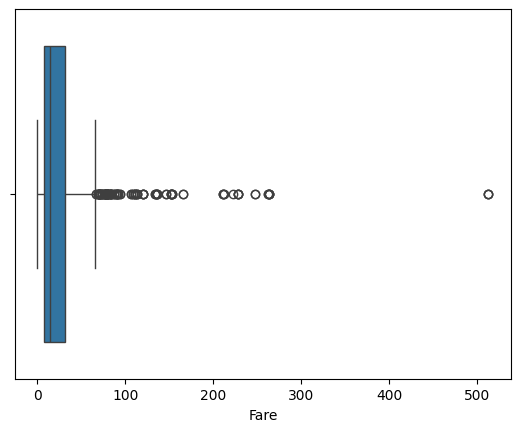

In [19]:
#@title Visualize outliers using boxplot
sns.boxplot(x=df['Fare'])


### Outliers according to Z-score

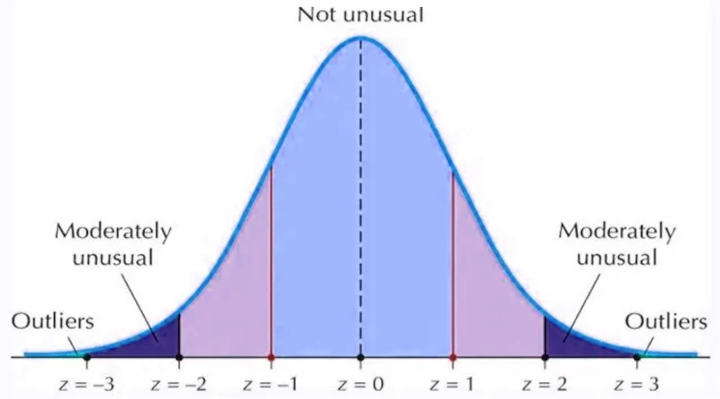

In [8]:
#@title Identify outliers using Z-score
z = np.abs(stats.zscore(df['Fare']))
threshold = 3
outliers = np.where(z > threshold)
df_outliers = df.iloc[outliers[0]]
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#@title Remove outliers using Z-score
df_no_outliers = df[(z < threshold)]
df_no_outliers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,871.000000,871.000000,871.000000,696.000000,871.000000,871.000000,871.000000
mean,445.319173,0.376579,2.338691,29.661164,0.517796,0.366246,26.530170
std,257.761917,0.484806,0.821469,14.571894,1.101448,0.792325,29.351184
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.862500
75%,665.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,164.866700


<Axes: xlabel='Fare'>

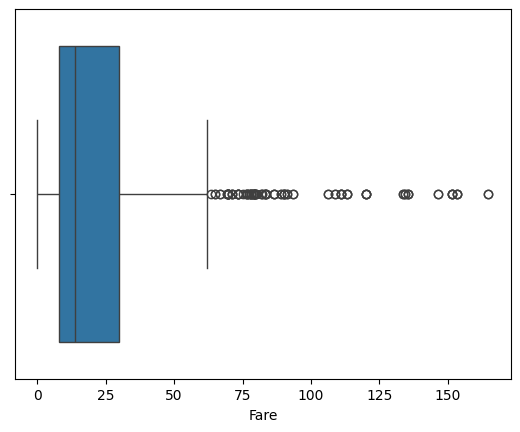

In [10]:

#@title Visualize outliers again using boxplot
sns.boxplot(x=df_no_outliers['Fare'])


### Outliers using Winsorization or Tukey Fences

In a nutshell:

*   **Winsorization** replaces (similar to removes) extreme values with nearest percentile value e.g. q01 or q99
*   **Tukey fences** adjusts extreme values to the nearest boundary within a defined range based on quartiles and IQR, rather than removing them entirely.



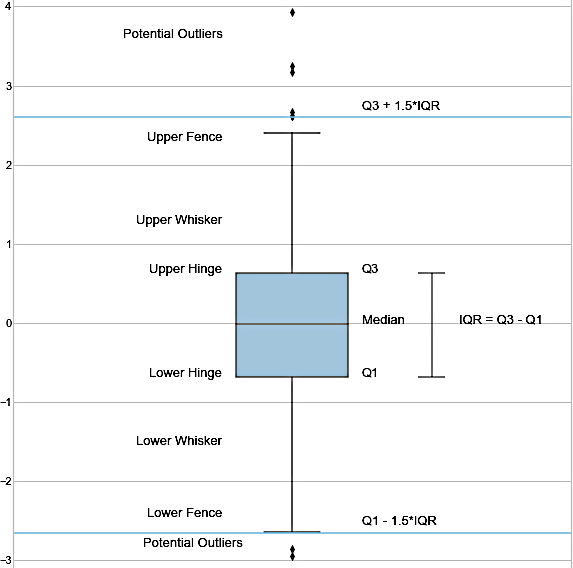

In [11]:
#@title Winsorization
q01 = df['Fare'].quantile(0.01)
q99 = df['Fare'].quantile(0.99)
df_winsorized = df.copy()

# df_winsorized['Fare'] = np.where(df_winsorized['Fare'] < q01, q01, df_winsorized['Fare'])
df_winsorized['Fare'] = np.where(df_winsorized['Fare'] > q99, q99, df_winsorized['Fare'])

In [12]:
#@title Tukey's fences
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR
df_tukey = df.copy()
df_tukey['Fare'] = np.where(df_tukey['Fare'] < lower_fence, lower_fence, df_tukey['Fare'])
df_tukey['Fare'] = np.where(df_tukey['Fare'] > upper_fence, upper_fence, df_tukey['Fare'])


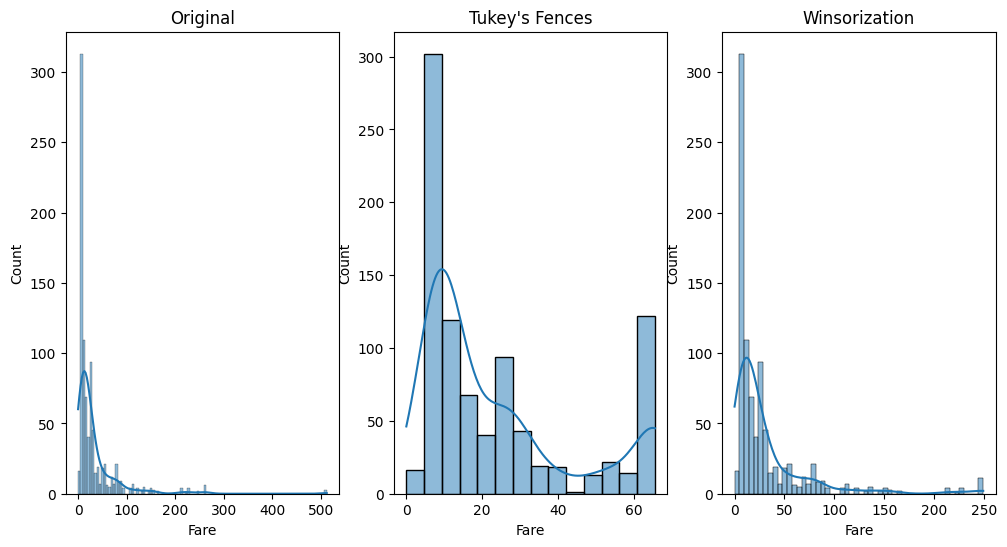

In [13]:
#@title Original vs. Tukey's Fences outlier removal
fig, axes = plt.subplots(ncols=3, figsize=(12, 6))
sns.histplot(df['Fare'], kde=True, ax=axes[0])
sns.histplot(df_tukey['Fare'], kde=True, ax=axes[1])
sns.histplot(df_winsorized['Fare'], kde=True, ax=axes[2])

# Set titles for the Distribution plots
axes[0].set_title('Original')
axes[1].set_title('Tukey\'s Fences')
axes[2].set_title('Winsorization')

# Display the plot
plt.show()

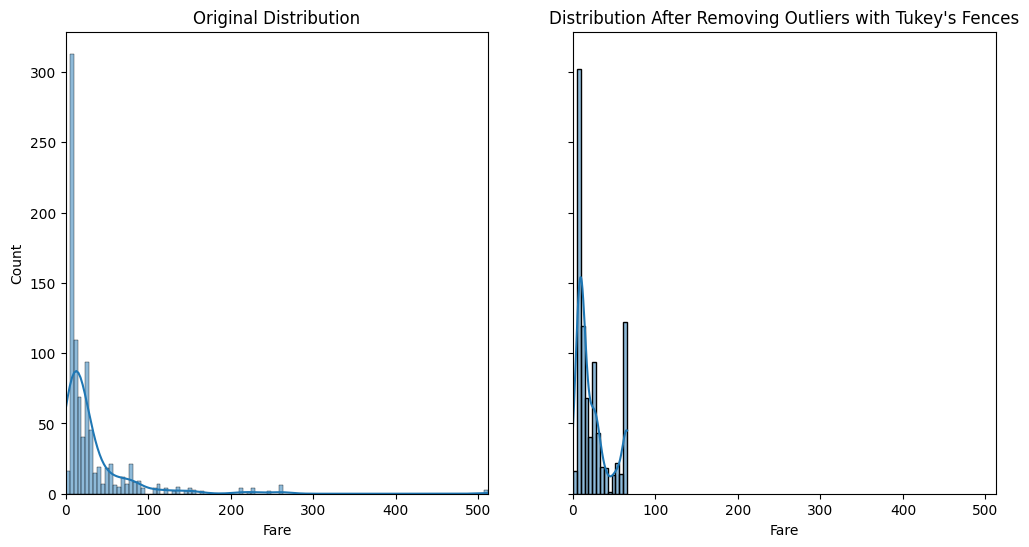

In [14]:
#@title Original vs. Tukey's Fences outlier removal with common normalization
fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
sns.histplot(df['Fare'], kde=True, ax=axes[0], common_norm=True)
sns.histplot(df_tukey['Fare'], kde=True, ax=axes[1], common_norm=True)

# Set titles for the plots
axes[0].set_title('Original Distribution')
axes[1].set_title('Distribution After Removing Outliers with Tukey\'s Fences')

# Still not good? Try manual limits:
xlim = (0, max(df['Fare'].max(), df_tukey['Fare'].max()))
axes[0].set_xlim(xlim)
axes[1].set_xlim(xlim)

# Display the plot
plt.show()


# **Mathematical Transform**

Transform applied to data using simple maths, such as taking the logarithm or square root, to reduce the impact of outliers.

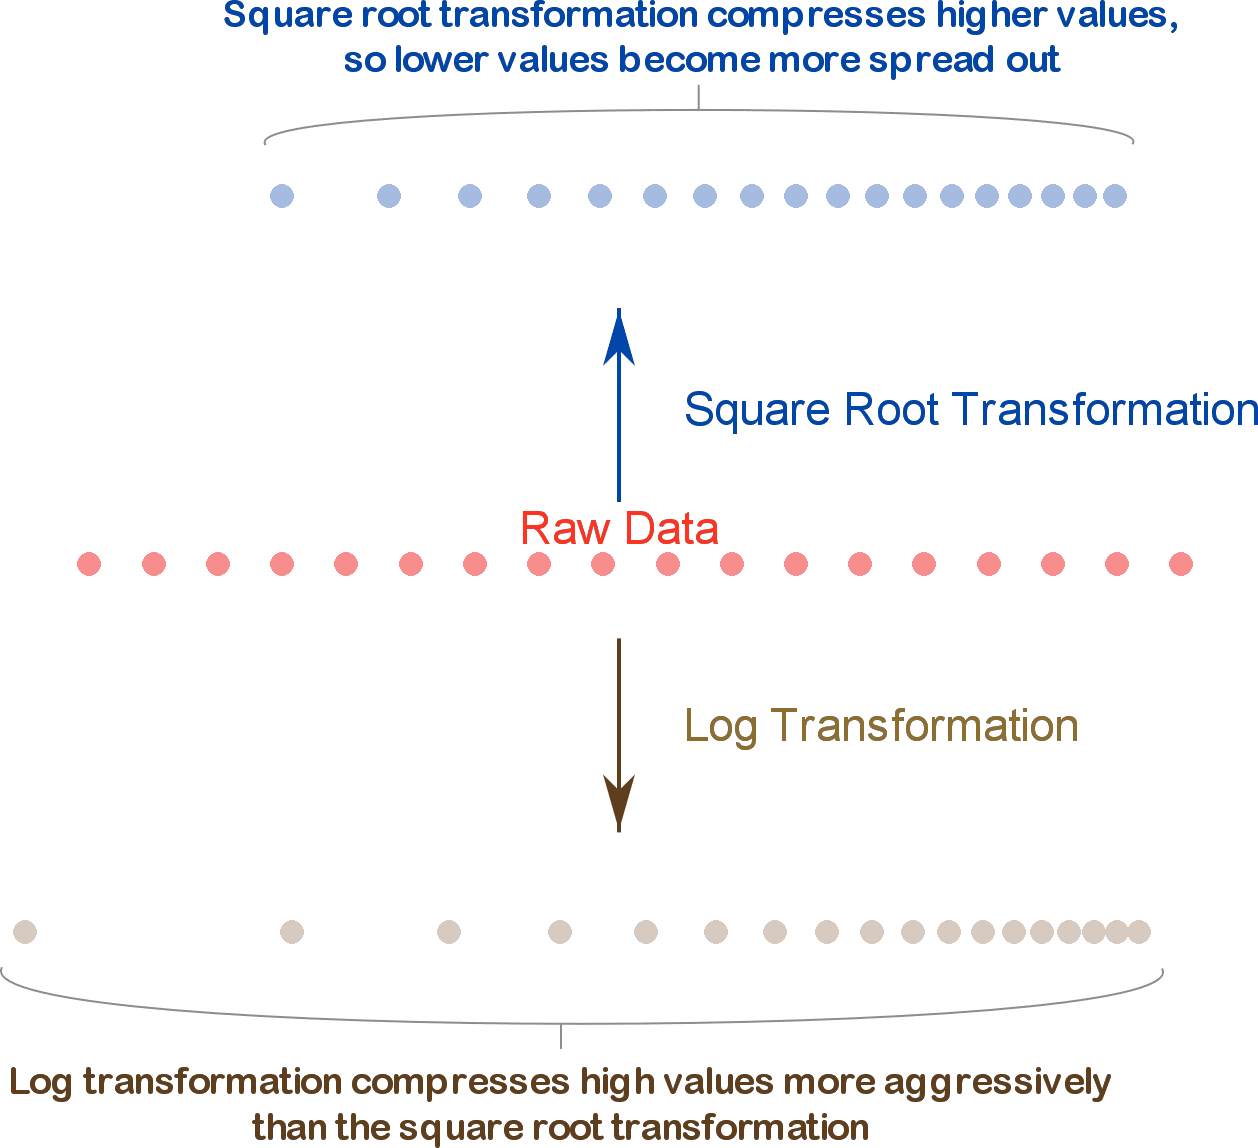

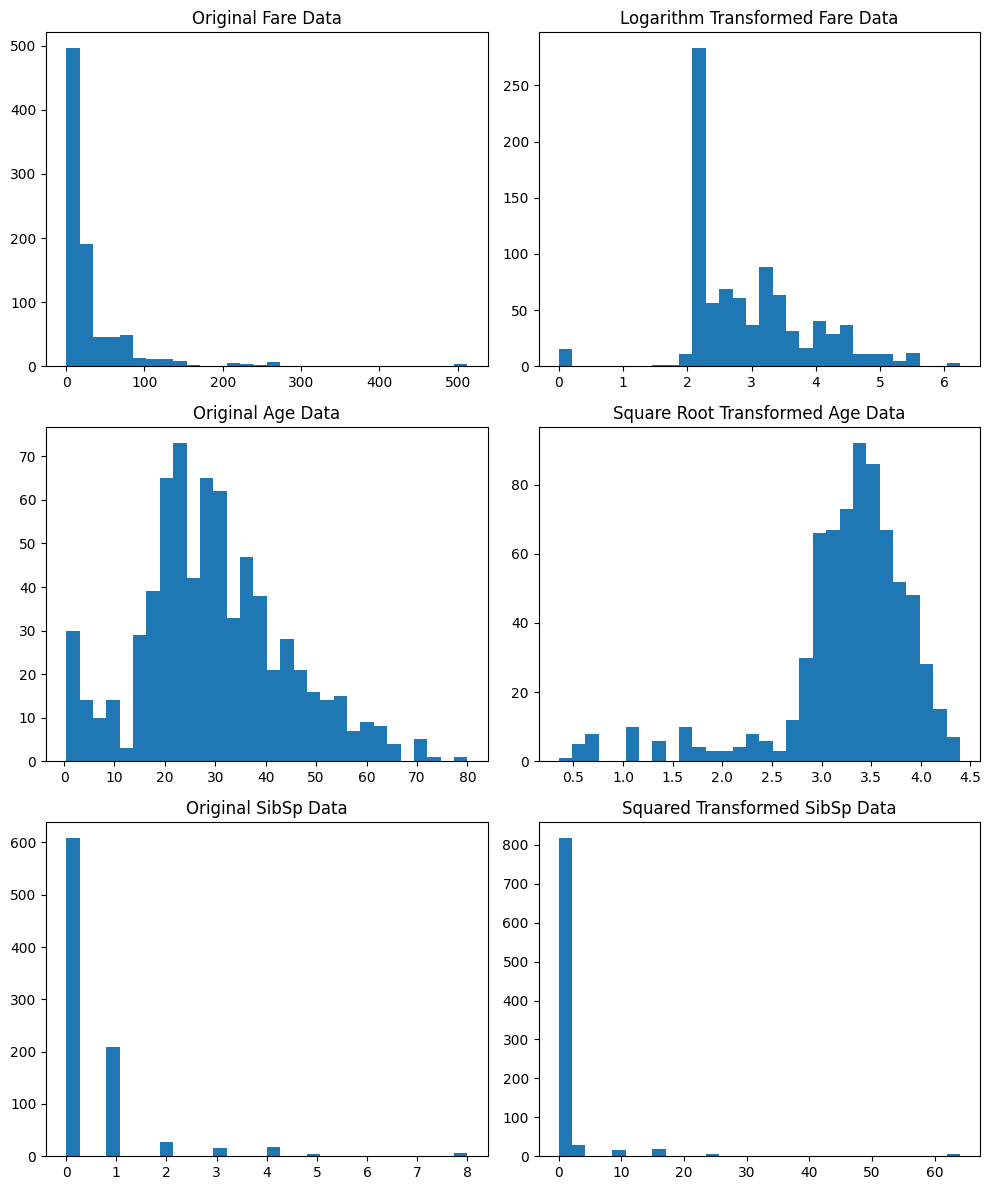

In [15]:
#@title Original vs. Log, Square and Square Root on Fare, Sibsp and Age

# Create a new dataframe to store the transformed data
transformed_df = pd.DataFrame()

# Apply the logarithm function to the 'Fare' column
transformed_df['log_fare'] = np.log(df['Fare'] + 1) # adding 1 to handle 0 fares

# Apply the square function to the 'SibSp' column
transformed_df['squared_sibsp'] = np.square(df['SibSp'])

# Apply the square root function to the 'Age' column
# transformed_df['sqrt_age'] = np.sqrt(df['Age'])
transformed_df['sqrt_age'] = np.log(df['Age'] + 1) # adding 1 to handle 0 fares


# Plot histograms to compare the original and transformed data
fig, axs = plt.subplots(3, 2, figsize=(10, 12))
axs[0, 0].hist(df['Fare'], bins=30)
axs[0, 0].set_title('Original Fare Data')
axs[0, 1].hist(transformed_df['log_fare'], bins=30)
axs[0, 1].set_title('Logarithm Transformed Fare Data')

axs[1, 0].hist(df['Age'], bins=30)
axs[1, 0].set_title('Original Age Data')
axs[1, 1].hist(transformed_df['sqrt_age'], bins=30)
axs[1, 1].set_title('Square Root Transformed Age Data')

axs[2, 0].hist(df['SibSp'], bins=30)
axs[2, 0].set_title('Original SibSp Data')
axs[2, 1].hist(transformed_df['squared_sibsp'], bins=30)
axs[2, 1].set_title('Squared Transformed SibSp Data')

plt.tight_layout()
plt.show()

**Logarithm**: Use logarithm on the `Fare` feature because of a concentration of values at the lower end of the distribution (cheap tickets), with a long tail towards the higher values (limited expensive tickets), which can create outliers and affect the analysis. Taking the logarithm helps to reduce the impact of these outliers more effectively than Square Root for something closer to a *normal distribution*.

**Square Root**: Use square root on the Age feature because it has a skewed distribution with a long tail towards higher ages, but not as bad as `Fare`. Applying the square root transformation helps to reduce the impact of extreme values and create a more *symmetric distribution*.

The reduced impact of outliers is possible because the square root transformation compresses the values at the high end of the range and expands the values at the low end of the range, thereby reducing the influence of extreme values on the distribution.

However, in some cases, this can have the effect of making the outliers **even more extreme** and more **sparse**, rather than reducing their influence on the distribution. Hence, it's important to carefully consider the characteristics of the data and the research question being addressed before applying any transformation. *e.g. more extreme outliers can make it easier to get rid of them using something like Robust/Huber Scaler*, but will if you don't remove them first, your model will suffer.

**Square**: Use square on the SibSp feature because it has a **discrete** and small range of values. The square transformation helps to increase the separation between values and to make it easier to spot/punish outliers. Don't forget to remove the now more obvious, extreme values (outliers). But why not use log or rebinning instead?

It's important to carefully consider the **general distribution of data** and characteristics of important **feature** for **intended model** before applying any mathematical transformation. See examples:

The `Sex` variable is categorical with two levels: 'male' and 'female'.
Should we use label encoding or one-hot encoding to represent this feature? Depends... some models like logistic regression or neural networks think that ordinal relationships exist, whereas some tree methods (not all) split sub-categories well.

# Remarks on Stats and Maths outlier removal methods

*   **Winsorization** can be useful when you want to **retain the distributional shape** of the data but limit the impact of extreme values.
*   **Tukey's fences** are a good choice when you want a **more robust** way to **shift** outliers with a reasonable value rather than simply removing them.

Explore their combinations to improve the results of data analysis. For example, a transformation method such as a log or square root transform can normalize the data before performing a robust regression. Alternatively, Winsorization/Tukey can replace/shift outliers before transforming the data to improve the normality of the distribution.

**Robust regression** methods are useful when you want to fit a model that is less sensitive to outliers. Too early in this course but here is some idea of what can be done in scikit

In [28]:
# @title Robust Regression often improves modelling of extreme data
def outlier_removal_regression(df, independent_col, target_col):


    # Robust regression
    X = df[[independent_col]]
    y = df[target_col]
    huber = HuberRegressor().fit(X, y)
    huber_preds = huber.predict(X)

    # Linear regression
    lin_reg = LinearRegression().fit(X, y)
    lin_reg_preds = lin_reg.predict(X)

    # Logistic regression
    log_reg = LogisticRegression().fit(X, y)
    log_reg_preds = log_reg.predict_proba(X)[:, 1]

    # Plotting
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    # Huber regression plot
    axes[0].scatter(X, y, color='black')
    axes[0].plot(X, huber_preds, color='blue', linestyle='--', marker='o', linewidth=1)
    axes[0].set_xlabel(independent_col)
    axes[0].set_ylabel(target_col)
    axes[0].set_title('Huber Regression')

    # Linear regression plot
    axes[1].scatter(X, y, color='yellow')
    axes[1].plot(X, lin_reg_preds, linestyle=':', marker='v', color='red', linewidth=1)
    axes[1].set_xlabel(independent_col)
    axes[1].set_ylabel(target_col)
    axes[1].set_title('Linear Regression')

    # Logistic regression plot
    axes[2].scatter(X, y, color='red')
    axes[2].plot(X, log_reg_preds, color='green', linestyle='-', marker='s', linewidth=1)
    axes[2].set_xlabel(independent_col)
    axes[2].set_ylabel(target_col)
    axes[2].set_title('Logistic Regression')

    fig.suptitle('Comparison of Regression Methods')
    plt.show()

In [29]:
#@title Categorization using Binning for Machine Learning or easier Data Analysis

# First reate a new column 'Age_Bin' by binning the 'Age' column (Coding skills level up: check it out in Data Analysis)
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
# age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['Age_Bin'] = pd.cut(df['Age'], bins=age_bins) #labels are automatically generated

`pd.cut` relies on you to specify desired bins, but can we automate this instead?

In [30]:
#@title Scikit my old fiend.. better avoid unless you want to use kmeans.
from sklearn.preprocessing import KBinsDiscretizer

# Assuming df is the DataFrame containing the Titanic dataset
kbins = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans')
df['Age_kBin'] = kbins.fit_transform(df[['Age']])


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


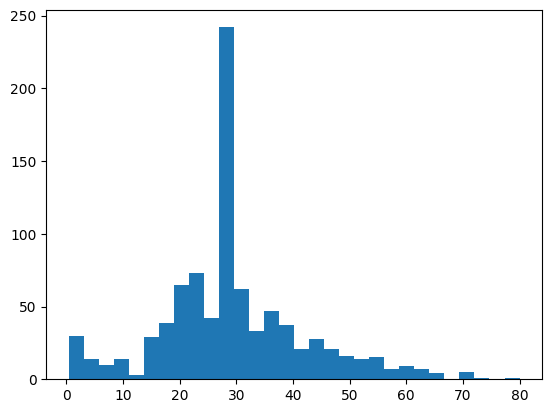

TypeError: qcut() missing 1 required positional argument: 'q'

In [31]:
#@title Automatic binning using Freedman–Diaconis rule
n, autobins, patches = plt.hist(df['Age'], bins='auto')
plt.show()
df['Age_AutoBin'] =  pd.qcut(df['Age']) #pd.cut(df['Age'], bins=autobins)


### You can decide if it is worth doing automatic binning, or whether the cure is worse than the disease!

In [ ]:
#@title Filter specific values?
df[df['Age_Bin'] == '0-10']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bin,Age_kBin,Age_AutoBin


In [ ]:
#@title Counts
display(df['Age_Bin'].value_counts().sort_index())
display(df['Age_kBin'].value_counts().sort_index())
display(df['Age_AutoBin'].value_counts().sort_index())

Age_Bin
(0, 10]      64
(10, 20]    115
(20, 30]    407
(30, 40]    154
(40, 50]     86
(50, 60]     42
(60, 70]     16
(70, 80]      5
Name: count, dtype: int64

Age_kBin
0.0     68
1.0    178
2.0    359
3.0    135
4.0     70
5.0     45
6.0     27
7.0      7
Name: count, dtype: int64

Age_AutoBin
(0.42, 3.073]        29
(3.073, 5.725]       14
(5.725, 8.378]       10
(8.378, 11.031]      14
(11.031, 13.683]      3
(13.683, 16.336]     29
(16.336, 18.989]     39
(18.989, 21.641]     65
(21.641, 24.294]     73
(24.294, 26.947]     42
(26.947, 29.599]    242
(29.599, 32.252]     62
(32.252, 34.905]     33
(34.905, 37.557]     47
(37.557, 40.21]      37
(40.21, 42.863]      21
(42.863, 45.515]     28
(45.515, 48.168]     21
(48.168, 50.821]     16
(50.821, 53.473]     14
(53.473, 56.126]     15
(56.126, 58.779]      7
(58.779, 61.431]      9
(61.431, 64.084]      7
(64.084, 66.737]      4
(66.737, 69.389]      0
(69.389, 72.042]      5
(72.042, 74.695]      1
(74.695, 77.347]      0
(77.347, 80.0]        1
Name: count, dtype: int64

# Titanic discussion of outlier removal methods

Outliers can arise due to various reasons, such as data entry errors, measurement errors, or genuine extreme values in the data. Handling outliers is important because they can affect the statistical properties of the data and the results of the analysis.

**Identify outliers using visualizations:** This method is useful when you want to get a quick overview of the distribution of your data and identify any extreme values that may be skewing your results. For example, if you are analyzing the age distribution of passengers on the Titanic, you can create comparative histograms or box plots of the data vs. methods to identify any outliers (e.g. passengers > 100 years old) and check which methods correct them best.

**Remove outliers using statistical methods:** This method is useful when you want to remove extreme values that are likely to be errors or anomalies in your data. For example, if you are analyzing the fare paid by passengers on the Titanic, you may want to remove any fares that are more than three standard deviations away from the mean, as these are likely to be errors in data entry.

**Winsorization:** Winsorization replaces extreme values with the **nearest non-extreme values** in the dataset. This method is useful when you want to preserve the overall distribution of your data but remove extreme values that may be skewing your results. For example, if you are analyzing the age distribution of passengers on the Titanic, you can use winsorization to replace any ages above the 99th percentile with the value at the 99th percentile.

**Tukey's fences:** This method is useful when you want to replace extreme values with values that are within a certain range, rather than simply removing them. For example, if you are analyzing the fare paid by passengers on the Titanic, you can use Tukey's fences to replace any fares that are more than **1.5 times the IQR** below the first quartile or above the third quartile with the nearest value within that range.

Stronger medicine not necessarily used at this point:

**Transform** the data using mathematical functions: This method is useful when you want to reduce the impact of extreme values on your analysis. For example, if you are analyzing the fare paid by passengers on the Titanic, you can take the logarithm of the fares to reduce the impact of any extreme values. It is particularly powerful at spacing out extremely low values (left skewed).

**Robust regression:** This method is useful when you want to fit a regression model that is less sensitive to outliers. For example, if you are analyzing the relationship between the age and fare paid by passengers on the Titanic, you can use robust regression to downweight the influence of any extreme values in your dataset.

**Machine learning:** This method is useful when you want to build a predictive model that is robust to outliers. For example, if you are analyzing the survival rate of passengers on the Titanic, you can use a machine learning algorithm like random forests or gradient boosting machines, which can handle outliers by partitioning the feature space into smaller regions. Explore decision trees first, as they are very easy to implement and fast.


# Conclusion of outlier removal methods

Tukey's method and logarithmic transformation performs compression -- bringing extreme values closer to the rest of the data rather than remove them entirely. Tukey's method replaces the extreme values with the nearest value within a certain range, while the logarithmic transformation compresses the range of most extreme (x) values, making them closer to the rest of the data.

On the other hand, winsorization and robust scaling are more aggressive in handling extreme values. Winsorization replaces extreme values with a predefined value, while robust scaling standardizes the data using a median and interquartile range, which is less sensitive to outliers. These methods may be preferred if extreme values are believed to be true outliers that need to be removed or if the analysis requires a more standardized scale -- useful as a prescaler for distance/weight based ML models.


<a name="validate"></a>
## **4. Validate data quality and consistency.**

Consistent formatting of variables can be an issue if you are bringing data from multiple sources or tables together. For example, if you’re analyzing small businesses in a metropolitan area based on customer reviews as well as sales data, the customer review data may include addresses in one format, while the sales data may include addresses in another format.

If you want to **integrate** these datasets, you’ll need to standardize the formatting of the addresses. You may need to break up the addresses into multiple columns, one for each of the components, such as building number, street name, city, state, and zip code. Then you could bring the components back together in a consistent way across both datasets, and finally merge the datasets together.

Inconsistent naming conventions are especially common in networking (packets), but there are several other examples -- lazy engineers or non-technical clients etc.


**Remember**, validating the quality and consistency of your data is an important step in the data preparation process. This ensures that your data is accurate, complete, and consistent. Here are some common techniques used to validate data quality and consistency:

1.   **Check for data types**

One way to validate the quality and consistency of your data is to check the data types of your columns. For example, if a column should contain numeric data but is instead represented as strings, this could lead to errors in analysis. **The titanic csv has this problem.** You can use the df.dtypes attribute to check the data types of all columns in your DataFrame.

2.   **Check for data range and distributions**

Another way to validate data quality and consistency is to check the range and distributions of your data. For example, if a column contains ages, you might check that the minimum and maximum ages are **within reasonable limits** and that the distribution of ages makes sense (e.g., not all ages are clustered around a single value or what else?). You can use descriptive statistics such as df.describe() for obviously issues and visualizations such as histograms or boxplots to check the range and distributions of your data more easily.

3.   **Check for data consistency**

Data consistency refers to ensuring that the values in your data make sense and are consistent with each other. For example, if you have a column for gender, you might check that all the values are either "male" or "female" and that there are no misspellings or inconsistencies in capitalization. You can use value_counts() or other methods to check the consistency of categorical data.

Here is an example of a typical approach to use to *continuously* validate data quality and consistency:

In [ ]:
#@title Check data types
df.dtypes


PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Age_Bin        category
Age_kBin        float64
Age_AutoBin    category
dtype: object

In [ ]:
#@title Count unique entries per variable/feature
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Cabin          147
Embarked         3
Age_Bin          8
Age_kBin         8
Age_AutoBin     28
dtype: int64

In [ ]:
#@title Check data range and distributions using some Descriptive Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_kBin
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681,2.268841
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504,1.428769
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,7.000000


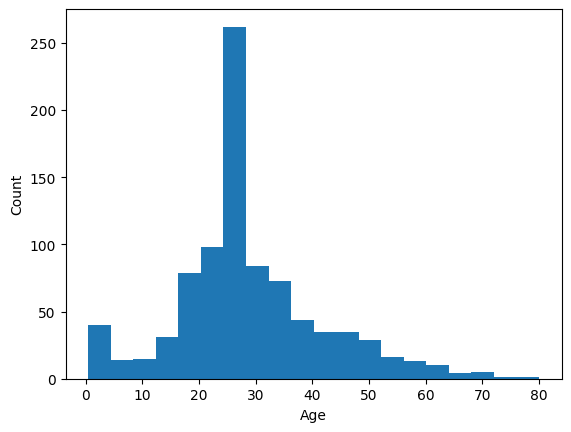

In [ ]:
#@title Plot histogram of age column
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Plotting a histogram of the age column is necessary to validate the data quality and consistency because it can reveal several potential issues with the dataset. For example:

**Outliers**: The histogram can reveal any outlier values that may be present in the age column. Outliers can skew the overall statistics of the dataset and can potentially invalidate any analysis or modeling performed on the dataset.

**Missing values**: The histogram can also show if there are any missing age values in the dataset. If there are gaps in the histogram, it may indicate missing values, incomplete data or the type of problem.

**Data entry errors**: A histogram can also reveal any data entry errors in the age column. For example, if there are values that are not within the expected range for age (e.g., negative values or values **greater than 120**), it may indicate data entry errors.

In [ ]:
#@title Check data consistency
print(df['Sex'].value_counts())
print()
print(df['Embarked'].value_counts()) # Southampton, Cherbourg, and Queenstown

Sex
male      577
female    312
Name: count, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


## Validation example on Data Transformation:

The 'SibSp' and 'Parch' columns on Titanic dataset refer to the number of siblings/spouses and parents/children that a passenger had on board the Titanic, respectively. We may want to check that the sum of 'SibSp' and 'Parch' columns is equal to the 'FamilySize' column


No null values in 'FamilySize' column.
Data consistency check passed: 'FamilySize' column is consistent with 'SibSp' and 'Parch' columns.
FamilySize column statistics:
count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64


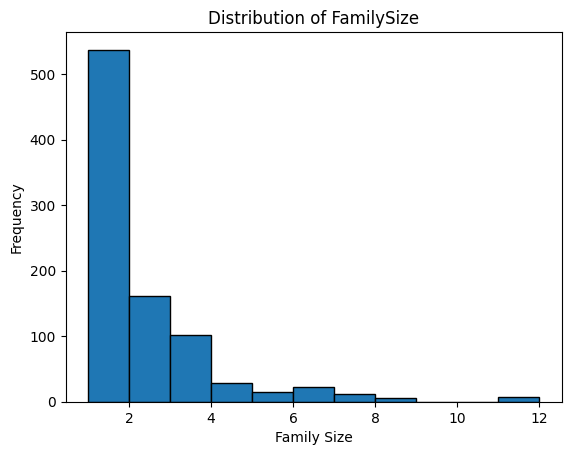

Range validation passed: 'FamilySize' falls within the expected range.


In [ ]:
#@title Superficial example of data quality validation after *Data Transformation*
# Create a new column for the pretend variable called family size
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DataScience/Code/DataScienceforAnalytics/Resources/Notebooks/Data/titanic/train.csv')


# Data Transformation: Create a new column for the family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Data Quality Validation
# 1. Check for null values in the new column (normally part of initial data cleaning)
null_check = df['FamilySize'].isnull().sum()
if null_check == 0:
    print("No null values in 'FamilySize' column.")
else:
    print(f"Data quality check failed: {null_check} null values found in 'FamilySize' column.")

# 2. Consistency check: Ensure 'FamilySize' matches 'SibSp' + 'Parch' + 1 (individual that bought ticket)
inconsistency_count = (df['FamilySize'] != (df['SibSp'] + df['Parch'] + 1)).sum()
if inconsistency_count == 0:
    print("Data consistency check passed: 'FamilySize' column is consistent with 'SibSp' and 'Parch' columns.")
else:
    print(f"Data consistency check failed: {inconsistency_count} inconsistencies found in 'FamilySize' column.")

# 3. Statistical validation: Check if the statistics of 'FamilySize' are reasonable
family_size_stats = df['FamilySize'].describe()
print("FamilySize column statistics:")
print(family_size_stats)

# 4. Distribution validation: Check if the distribution of 'FamilySize' makes sense
import matplotlib.pyplot as plt

plt.hist(df['FamilySize'], bins=range(1, df['FamilySize'].max() + 2), edgecolor='black')
plt.title('Distribution of FamilySize')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

# 5. Range validation: Ensure 'FamilySize' falls within expected range (1 to max family size)
expected_range_check = df['FamilySize'].between(1, df['FamilySize'].max()).all()
if expected_range_check:
    print("Range validation passed: 'FamilySize' falls within the expected range.")
else:
    print("Range validation failed: 'FamilySize' contains values outside the expected range.")

Note that the above example was superficially created to be in line with the following:

**Transformation**: Creates the `FamilySize` column by adding `SibSp` and `Parch`, then adding 1.

**Validation**:
1.   Null Check: Ensures there are no null values in the `FamilySize` column.
1.   Consistency Check: Confirms that `FamilySize` is consistent with the sum of SibSp and Parch plus 1 (ticket purchaser).
1.   Statistical Validation: Prints summary statistics for the `FamilySize` column to ensure values are within a reasonable range.
1.   Distribution Validation: Plots a histogram of the `FamilySize` column to visually inspect its distribution.
1.   Range Validation: Ensures that `FamilySize` values fall within the expected range.

A better way to do validation on Titanic is:

**Academic:** Compare the derived `FamilySize` against external data sources or literature to validate such that the aggregation logic aligns with expected outcomes from similar studies or datasets.

**Business:** Another way is if there's specific business logic or rules (e.g., special handling for certain groups or conditions), validate that the transformation reflects these rules accurately.

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

# **c. Data integration:**

Data integration is often perceived as a straightforward task, but its importance becomes evident in scenarios such as corporate mergers where disparate datasets must converge seamlessly. The process typically addresses the following tasks:

1.   Identifying and Merging Data: Gathering and consolidating data from diverse sources, ensuring comprehensive coverage.

1.   Resolving Data Conflicts: Addressing discrepancies and inconsistencies to ensure data accuracy and reliability. This often involves redoing earlier steps such as **Data Cleaning**.

1.   Creating a Unified Schema: Establishing a cohesive data structure that harmonizes varied formats and attributes, facilitating streamlined analysis and application.

## **1. Identify and merge data from multiple sources**
Let's say we have two datasets: `sales.csv` and `customers.csv`. Merge them on the `customer_id` column to create a single dataset.

However, let's try a different online csv example:

In [ ]:
#@title Load and identify the new online dataset
import pandas as pd

students = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/student.csv')
marks = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/mark.csv')
print(students.head(),'\n')
print(marks.head())

   Student_id  Age  Gender      Grade Employed
0           1   19    Male  1st Class      yes
1           2   20  Female  2nd Class       no
2           3   18    Male  1st Class       no
3           4   21  Female  2nd Class       no
4           5   19    Male  1st Class       no 

   Student_id  Mark     City
0           1    95  Chennai
1           2    70    Delhi
2           3    98   Mumbai
3           4    75     Pune
4           5    89    Kochi


The two datasets have a common column, `Student_id`, which can be used to merge the data into a single dataframe. Use the `merge()` function provided by Pandas to merge the two dataframes on the `Student_id` column:

In [ ]:
#@title Merge the data
merged_data = pd.merge(students, marks, on='Student_id')
merged_data.head()

,Student_id,Age,Gender,Grade,Employed,Mark,City
0,1,19,Male,1st Class,yes,95,Chennai
1,2,20,Female,2nd Class,no,70,Delhi
2,3,18,Male,1st Class,no,98,Mumbai
3,4,21,Female,2nd Class,no,75,Pune
4,5,19,Male,1st Class,no,89,Kochi


Check for any data conflicts and inconsistencies in the merged dataframe. For example, any missing values or duplicate entries:

In [ ]:
#@title (Re)Check for any data conflicts and inconsistencies
print(merged_data.isnull().sum())
print(merged_data.duplicated().sum())

Student_id    0
Age           0
Gender        0
Grade         0
Employed      0
Mark          0
City          0
dtype: int64
0


Finally, we can create a unified schema for the data by renaming the columns to a more descriptive name and rearranging the columns. A unified schema is a standardized way of organizing data but in this case a simple CSV file. This means that the data follows a consistent structure, where each column represents a unique data point or variable, and the rows contain values for those variables. Here is a limited but clear example:

In [ ]:
#@title Unified schema
merged_data = merged_data.rename(columns={
    'Student_id': 'Student ID',
    'Age': 'Student Age',
    'Gender': 'Student Gender',
    'Grade': 'Student Grade',
    'Employed': 'Employment Status',
    'Mark': 'Exam Mark',
    'City': 'City of Residence'
})

merged_data = merged_data[['Student ID', 'Student Age', 'Student Gender', 'Student Grade', 'Exam Mark', 'Employment Status', 'City of Residence']]

merged_data.head()

,Student ID,Student Age,Student Gender,Student Grade,Exam Mark,Employment Status,City of Residence
0,1,19,Male,1st Class,95,yes,Chennai
1,2,20,Female,2nd Class,70,no,Delhi
2,3,18,Male,1st Class,98,no,Mumbai
3,4,21,Female,2nd Class,75,no,Pune
4,5,19,Male,1st Class,89,no,Kochi


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

# **d. Data transformation:**
1.   Discretization:  transforming continuous variables into categorical variables.
*   Binning (revisited):
*   Histogram analysis
*   Cluster analysis
*   Correlation analysis
2.   Scaling into a range/distribution
*   Normalization
*   Standardization
*   Log transformation
*   Non-linear methods
3.   ML One-hot encoding and Feature engineering: creating new features from existing data to improve model performance.
4.   Create new variables or features from existing variables.


**Table 1: ** Learn basics data science concepts for homework

$$
\begin{array}{|l|l|l|}
\hline \textbf { Features } & \textbf { Categorical data } & \textbf { Numerical data } \\
\hline \text { Definition } & \begin{array}{l}
\text { Categorical data refers to a data type that } \\
\text { can be stored and identified based on the } \\
\text { names or labels given to them. }
\end{array} & \begin{array}{l}
\text { Numerical data refers to the data that is in } \\
\text { the form of numbers, and not in any } \\
\text { language or descriptive form. }
\end{array} \\
\hline \text { Alias } & \begin{array}{l}
\text { Also known as qualitative data as it } \\
\text { qualifies data before classifying it. }
\end{array} & \begin{array}{l}
\text { Also known as quantitative data as it } \\
\text { represents quantitative values to perform } \\
\text { arithmetic operations on them. }
\end{array} \\
\hline \text { Examples } & \begin{array}{l}
\text { What is your gender? } \\
\text { - Male } \\
\text { - Female } \\
\text { - Other }
\end{array} & \begin{array}{l}
\text { What is your test score out of } 20 \text { ? } \\
\text { - Below } 5 \\
\text { - } 5-10 \\
\text { - } 10-15 \\
\text { - } 15-20 \\
\text { - } 20
\end{array} \\
\hline \text { Types } & \text { Ordinal data and Nominal data and . } & \text { Discrete data and Continuous data. } \\
\hline \text { Characteristics } & \begin{array}{l}
\text { - No order scale } \\
\text { - Natural language description } \\
\text { - Can take numerical values but with } \\
\text { qualitative properties } \\
\text { - Can be visualized using bar charts and } \\
\text { pie charts }
\end{array} & \begin{array}{l}
\text { - Has an ordered scale } \\
\text { - Not use of natural language description } \\
\text { - Takes numeric values with numeric } \\
\text { qualities } \\
\text { - Can be visualized using bar charts and } \\
\text { pie charts }
\end{array} \\
\hline \begin{array}{l}
\text { User-friendly } \\
\text { design }
\end{array} & \begin{array}{l}
\text { Can include long surveys and has a } \\
\text { chance of pushing respondents away. }
\end{array} & \begin{array}{l}
\text { Survey interaction is easy and short, hence } \\
\text { fewer survey abandonment issues. }
\end{array} \\
\hline \begin{array}{l}
\text { Data collection } \\
\text { method }
\end{array} & \begin{array}{l}
\text { Nominal data: open-ended questions } \\
\text { Ordinal data: multiple-choice questions }
\end{array} & \begin{array}{l}
\text { Mostly collected through multiple-choice } \\
\text { questions and sometimes through open- } \\
\text { ended questions. }
\end{array} \\
\hline \begin{array}{l}
\text { Data collection } \\
\text { tools }
\end{array} & \text { Questionnaires, surveys, and interviews } & \begin{array}{l}
\text { Questionnaires, surveys, interviews, focus } \\
\text { groups and observations }
\end{array} \\
\hline \begin{array}{l}
\text { Analysis and } \\
\text { interpretation }
\end{array} & \begin{array}{l}
\text { Median and mode Eg: univariate statistics, } \\
\text { bivariate statistics, regression analysis }
\end{array} & \begin{array}{l}
\text { Descriptive and inferential statistics Eg: } \\
\text { measures of central tendency, turf analysis, } \\
\text { text analysis, conjoint analysis, trend } \\
\text { analysis }
\end{array} \\
\hline \text { Uses } & \begin{array}{l}
\text { Used when a study requires respondents' } \\
\text { personal information, opinions and } \\
\text { experiences. Commonly used in business } \\
\text { research }
\end{array} & \begin{array}{l}
\text { Used for statistical calculations as a result } \\
\text { of the potential performance of arithmetic } \\
\text { operations }
\end{array} \\
\hline \text { Compatibility } & \begin{array}{l}
\text { It is not compatible with most statistical } \\
\text { analysis methods, hence researchers } \\
\text { avoid using it most of the times }
\end{array} & \begin{array}{l}
\text { It is compatible with most statistical } \\
\text { calculation methods. }
\end{array} \\
\hline \text { Visualization } & \begin{array}{l}
\text { Can be visualized using only bar graphs } \\
\text { and pie charts. }
\end{array} & \begin{array}{l}
\text { Can be visualized using bar graphs, pie } \\
\text { charts as well as scatter plots. }
\end{array} \\
\hline \text { Structure } & \begin{array}{l}
\text { Is known as unstructured or semi- } \\
\text { structured data. It can use indexing } \\
\text { methods to structure data like Google, } \\
\text { Bing etc. }
\end{array} & \begin{array}{l}
\text { It is structured data and can be quickly } \\
\text { organized and made sense of }
\end{array} \\
\hline
\end{array}
$$


The `tips` dataset, embedded within Seaborn, is a collection of records representing the tipping behavior of restaurant patrons. The dataset comprises:
- `total_bill`: Total bill amount.
- `tip`: Tip amount.
- `sex`: Gender of the customer.
- `smoker`: Whether the customer is a smoker.
- `day`: Day of the week.
- `time`: Whether it’s lunch or dinner.
- `size`: Number of people in the party.

In [ ]:
#@title Load a the Restaurant Tips dataset
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


## **1. Discretization:**
**Binning** is a method of discretization that involves dividing a continuous variable into a set of bins or intervals. This can be useful for reducing the noise in data, identifying outliers, and simplifying analysis.

### Tips dataset

The waiter collected several variables: The **tip** in dollars, the **bill** in dollars, the **sex** of the bill payer, whether there were **smokers** in the party, the **day** of the week, the **time** of day and the **size** of the party.

In [ ]:
#@title Binning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bin the total_bill column into 5 equally sized bins
bins = pd.cut(df['total_bill'], bins=5)

# Create a new column in the df dataframe to store the binned values
df['total_bill_binned'] = bins

# Display the resulting dataframe
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_binned
0,16.99,1.01,Female,No,Sun,Dinner,2,"(12.618, 22.166]"
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.022, 12.618]"
2,21.01,3.50,Male,No,Sun,Dinner,3,"(12.618, 22.166]"
3,23.68,3.31,Male,No,Sun,Dinner,2,"(22.166, 31.714]"
4,24.59,3.61,Female,No,Sun,Dinner,4,"(22.166, 31.714]"


In this example, the `pd.cut()` method bins the total_bill column in the tips dataset into 5 equal-width bins based on the range (different quantile sizes). This is automatically labelled however.

How about giving it more meaningful labels, for better supervised applications. In this case, categorical labels (rather than numerical intervals) can be more straightforward:

In [ ]:
#@title Binning: Nicer labelling for later supervised learning?

# Define the edges of the bins to represent the lowest and highest total bill values
bin_edges = [0, 10, 20, 30, 40, df['total_bill'].max()]

# Define the labels for each bin
bin_labels = ['cheapest', 'cheap', 'moderate', 'expensive', 'most expensive']

# Bin the total_bill column using pd.cut() and the defined bin edges and labels
bins = pd.cut(df['total_bill'], bins=bin_edges, labels=bin_labels)

# Create a new column in the df dataframe to store the binned values
df['total_bill_binned'] = bins

# Display the resulting dataframe
df.head()
df[df['total_bill_binned'] == 'cheap']

,total_bill,tip,sex,smoker,day,time,size,total_bill_binned
0,16.99,1.01,Female,No,Sun,Dinner,2,cheap
1,10.34,1.66,Male,No,Sun,Dinner,3,cheap
8,15.04,1.96,Male,No,Sun,Dinner,2,cheap
9,14.78,3.23,Male,No,Sun,Dinner,2,cheap
10,10.27,1.71,Male,No,Sun,Dinner,2,cheap
...,...,...,...,...,...,...,...,...
234,15.53,3.00,Male,Yes,Sat,Dinner,2,cheap
235,10.07,1.25,Male,No,Sat,Dinner,2,cheap
236,12.60,1.00,Male,Yes,Sat,Dinner,2,cheap
242,17.82,1.75,Male,No,Sat,Dinner,2,cheap


`total_bill_binned` clearly does not contains nominal data. **However, is it categorical, ordinal or discrete!?**

### Aggregation: Do not underestimate its usefulness!

Remember we used `sum()` in Chapter 0, but this time we use `last()` as the **Aggregation** method

In [ ]:
#@title Don't forget the power of grouping categorical variables!
grouped = df.groupby('total_bill_binned')
result = grouped.last()
result

,total_bill,tip,sex,smoker,day,time,size
total_bill_binned,,,,,,,
cheapest,8.58,1.92,Male,Yes,Fri,Lunch,1
cheap,18.78,3.00,Female,No,Thur,Dinner,2
moderate,22.67,2.00,Male,Yes,Sat,Dinner,2
expensive,35.83,4.67,Female,No,Sat,Dinner,3
most expensive,48.33,9.00,Male,No,Sat,Dinner,4


### Common **Aggregation** functions for grouped data:

1.   sum(): Computes the sum of values within each group.
1.   count(): Counts the number of non-null values within each group.
1.   mean(): Computes the mean (average) of values within each group.
1.   median(): Computes the median value within each group.
1.   min(): Finds the minimum value within each group.
1.   max(): Finds the maximum value within each group.
1.   std(): Computes the standard deviation of values within each group.
1.   var(): Computes the variance of values within each group.
1.   describe(): Generates summary statistics (count, mean, std, min, 25%, 50%, 75%, max) for each group.
1.   first(): Returns the first row of each group.
1.   last(): Returns the last row of each group.
1.   nth(n): Returns the nth row from each group (n can be specified).
1.   agg(func): Applies one or more aggregation functions defined by func.




In [ ]:
#@title Define Standardization (Z-score normalization)
def zscore_norm(x):
    return (x - x.mean()) / x.std()

# Apply the transform function within each group
df['TipZScore'] = df.groupby('total_bill_binned')['tip'].transform(zscore_norm)

df[['total_bill_binned', 'tip', 'TipZScore']].head(100)

,total_bill_binned,tip,TipZScore
0,cheap,1.01,-1.882091
1,cheap,1.66,-1.035611
2,moderate,3.50,-0.093017
3,moderate,3.31,-0.257126
4,moderate,3.61,0.001993
...,...,...,...
95,most expensive,4.73,-0.290757
96,moderate,4.00,0.338848
97,cheap,1.50,-1.243975
98,moderate,3.00,-0.524882


### Why care about **Central Tendency**?

`TipZScore` is useful to measure how tips relate to different total bill categories (`total_bill_binned`).

*   By Standardizing tip values using z-scores within each category, TipZScore simplifies comparisons by highlighting tips that deviate significantly from the average.

*   Aids in pinpointing outliers and offers a uniform metric for assessing tipping behaviour across various spending levels.

*   A foundation for further insights into customer tipping habits, which ultimately informs decisions on service improvements, pricing strategies, and customer satisfaction efforts.

In [ ]:
#@title Define a function to filter rows based on a low tip amount

filtered_groups = df[df['tip'] < 1.5]

# Display the filtered data for verification
filtered_groups[['total_bill_binned', 'tip']]


,total_bill_binned,tip
0,cheap,1.01
30,cheapest,1.45
43,cheapest,1.32
67,cheapest,1.00
75,cheap,1.25
92,cheapest,1.00
111,cheapest,1.00
126,cheapest,1.48
135,cheapest,1.25
146,cheap,1.36


## Data Analysis <-> Data Transformation

They are linked and often happen together during the overall process.

**Histogram analysis** is a way to visualize the distribution of a continuous variable by creating a histogram, which shows the frequency of each value or bin in the variable.

In this example, use the pyplot library to create a histogram of the total_bill column:

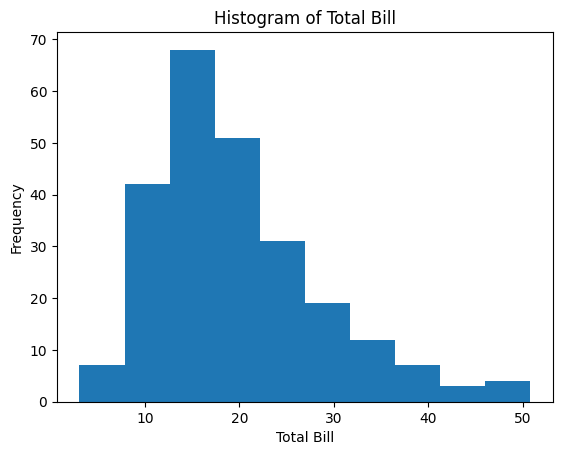

In [ ]:
#@title Histogram analysis

# Create a histogram of the size of table column
plt.hist(df['total_bill'])

# Add labels and title to the plot
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bill')
plt.show()

The resulting histogram shows the right-tailed (skewed) distribution of the total_bill column in the tips dataset.

Can we prepare it for Standardization?

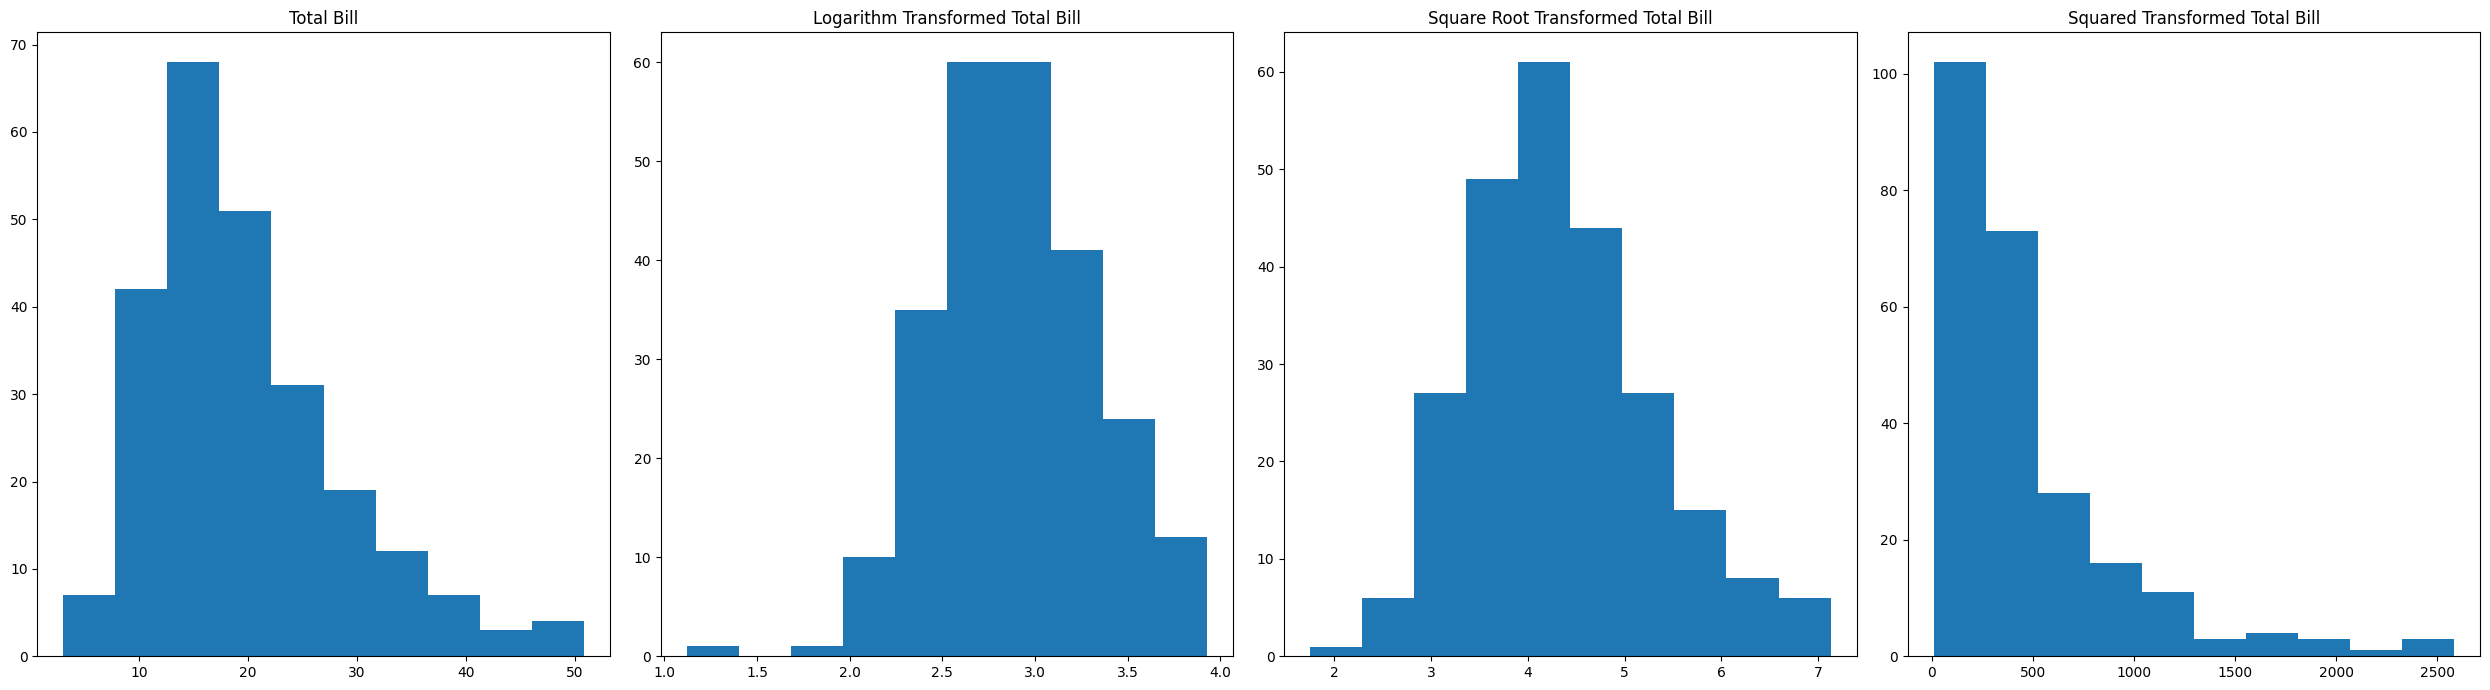

In [ ]:
var = 'total_bill'
transformed_df = pd.DataFrame()
# Apply the logarithm function
transformed_df['log_'+var] = np.log(df[var])

# Apply the square root function
transformed_df['sqrt_'+var] = np.sqrt(df[var])

# Apply the square function
transformed_df['squared_'+var] = np.square(df[var])

# Plot histograms to compare the original and transformed data
fig, axs = plt.subplots(1, 4, figsize=(25, 7))
axs[0].hist(df[var])
axs[0].set_title('Total Bill')
axs[1].hist(transformed_df['log_'+var])
axs[1].set_title('Logarithm Transformed Total Bill')
axs[2].hist(transformed_df['sqrt_'+var])
axs[2].set_title('Square Root Transformed Total Bill')
axs[3].hist(transformed_df['squared_'+var])
axs[3].set_title('Squared Transformed Total Bill')

plt.tight_layout()
plt.show()

**Cluster analysis** is a method of grouping data points together based on their similarity. This can be useful for finding patterns in data and identifying outliers.

The KMeans ML algorithm from the sklearn library to cluster the observations in the tips dataset based on the total_bill and tip columns:

In [ ]:
#@title Cluster analysis
from sklearn.cluster import KMeans

# Select the total_bill and tip columns from the df dataframe
X = df[['total_bill', 'tip']]

# Create a KMeans object with k specified clusters
k = 5
kmeans = KMeans(n_clusters=k)

# Fit the KMeans object to the data
kmeans.fit(X)

# Create a copy of the original dataframe
df_clustered = df.copy()

# Add a new column to the df dataframe to store the cluster labels
df_clustered['cluster_labels'] = kmeans.labels_

# Display the resulting dataframe
df_clustered.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,total_bill,tip,sex,smoker,day,time,size,total_bill_binned,TipZScore,cluster_labels
0,16.99,1.01,Female,No,Sun,Dinner,2,cheap,-1.882091,3
1,10.34,1.66,Male,No,Sun,Dinner,3,cheap,-1.035611,1
2,21.01,3.50,Male,No,Sun,Dinner,3,moderate,-0.093017,0
3,23.68,3.31,Male,No,Sun,Dinner,2,moderate,-0.257126,0
4,24.59,3.61,Female,No,Sun,Dinner,4,moderate,0.001993,0


The KMeans algorithm was able to separate the data into three distinct groups based on the 'total_bill' and 'tip' columns. The scatter plot shows that each cluster has a different range of values for both 'total_bill' and 'tip', suggesting that these two variables may be related in some way.

However, it is important to note that ***correlation does not necessarily imply causation***, and further analysis would be needed to determine the nature of the relationship between 'total_bill' and 'tip'. Additionally, different clustering algorithms or parameters could produce different results, so it is important to consider the results in the context of the specific analysis and data.

In [ ]:
#@title Grouping revisted. Do all aggregation methods work?
# Display the resulting dataframe in groups
df_clustered.groupby('total_bill_binned').min()

,total_bill,tip,sex,smoker,day,time,size,TipZScore,cluster_labels
total_bill_binned,,,,,,,,,
cheapest,3.07,1.00,Female,No,Fri,Dinner,1,-0.764220,1
cheap,10.07,1.00,Female,No,Fri,Dinner,1,-1.895114,0
moderate,20.08,1.50,Female,No,Fri,Dinner,2,-1.820479,0
expensive,30.06,1.17,Female,No,Sat,Dinner,2,-1.901938,2
most expensive,40.17,2.50,Female,No,Fri,Dinner,2,-1.196329,2


What if you really want to work out the mean on categorical variables for some odd reason?

In [ ]:
#@title Group again, but is it always sensible?
# Display the resulting dataframe in groups
df_clustered.groupby('total_bill_binned').mean(numeric_only=True)

,total_bill,tip,size,TipZScore,cluster_labels
total_bill_binned,,,,,
cheapest,8.082941,1.837647,1.823529,2.130649e-16,1.000000
cheap,14.870077,2.455231,2.223077,1.520152e-16,2.138462
moderate,24.027077,3.607692,2.953846,-8.540177e-17,0.923077
expensive,33.874545,4.190909,3.500000,-3.002649e-16,3.636364
most expensive,45.025000,5.446000,3.800000,1.554312e-16,2.000000


## Correlation does not necessarily imply causation

In other words, the relationship between two variables may be due to some other underlying factor, rather than one variable causing a change in the other.

For example, there may be a correlation between ice cream sales and crime rates in a particular city, with both variables increasing during the summer months. However, this does not mean that ice cream sales cause crime, or that crime causes people to buy more ice cream. Rather, the underlying factor in this case may be the **warmer weather during the summer** months, which can lead to both **increased** ice cream **sales** and more **outdoor activities**, which may in turn lead to more crime.

<ipython-input-52-ccdf0e430a1e>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df_clustered.loc[mask, 'total_bill'], df_clustered.loc[mask, 'tip'], c=color, label=f'Cluster {cluster_label}')


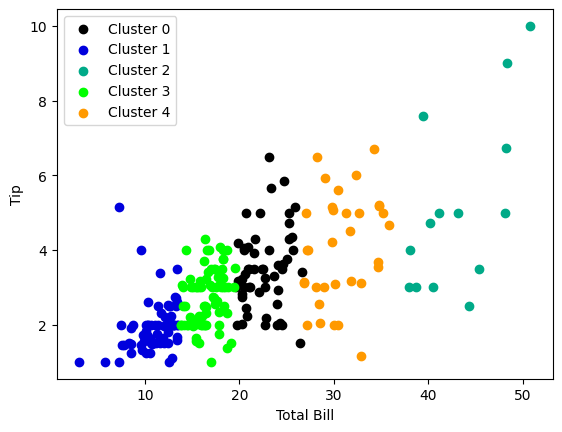

In [ ]:
#@title Visualizing Cluster analysis

# Define the color map for the clusters
# color_map = {0: 'red', 1: 'green', 2: 'blue'}
color_map = {i: plt.cm.nipy_spectral(float(i) / k) for i in range(k)}

# Create a scatter plot of total_bill vs. tip, color-coded by cluster label
fig, ax = plt.subplots()
for cluster_label, color in color_map.items():
    mask = df_clustered['cluster_labels'] == cluster_label
    ax.scatter(df_clustered.loc[mask, 'total_bill'], df_clustered.loc[mask, 'tip'], c=color, label=f'Cluster {cluster_label}')

ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
ax.legend()
plt.show()

Painful amount of code + generic cluster names 😞

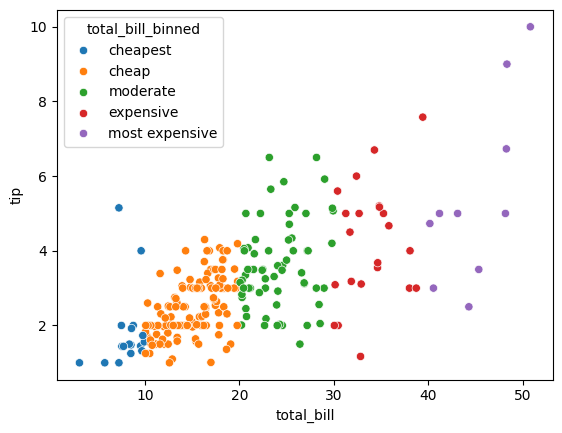

In [ ]:
sns.scatterplot(data=df_clustered, x='total_bill', y='tip', hue='total_bill_binned')
plt.show()

## **Correlation analysis** is a method of measuring the strength of the relationship between two variables.



 This can be useful for identifying patterns and making predictions. `df.cov()` and `df.corr()` are both methods in Pandas that are used to calculate the relationship between two variables in a DataFrame.

`df.cov()` calculates the covariance between variables. Covariance measures how **two variables change together**. It gives an indication of the direction of the linear relationship between the variables. A **positive** covariance indicates that the variables *tend* to move in the **same direction**, while a **negative** covariance indicates that the variables *tend* to move in **opposite directions**. The **magnitude** of the covariance gives an indication of the **strength** of the **relationship** between the variables.

**`df.corr()`** calculates the correlation between variables. Correlation **measures the strength of the linear relationship between two variables**. Correlation ranges from -1 to 1, where a correlation of 1 indicates a perfect positive correlation (same direction), a correlation of -1 indicates a perfect negative correlation (opposite directions), and a correlation of 0 indicates no linear relationship between the variables.

**Correlation** is generally **preferred** over covariance, as it is a **standardized** measure that is easier to interpret and compare between different datasets. Standardized, because it is a unitless and not affected by the scale of the variables being measured. Calculated by dividing the covariance between two variables by the product of their standard deviations -- produces a value that ranges from -1 to 1.
**Scaling** is covered soon.

In this example, we will use the **`df.corr()`** method to calculate the correlation matrix for the tips dataset:

## **4.   Create new variables or features from existing variables.**

Let's do it earlier here for the sake of this Data Transformation (Reformatting) example:

In [ ]:
# @title Create new variables based on existing variables
df['tip_percentage'] = df['tip'] / df['total_bill']
df['price_per_person'] = df['total_bill'] / df['size']
df

,total_bill,tip,sex,smoker,day,time,size,total_bill_binned,TipZScore,tip_percentage,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,cheap,-1.882091,0.059447,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,cheap,-1.035611,0.160542,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,moderate,-0.093017,0.166587,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,moderate,-0.257126,0.139780,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,moderate,0.001993,0.146808,6.147500
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,moderate,1.997211,0.203927,9.676667
240,27.18,2.00,Female,Yes,Sat,Dinner,2,moderate,-1.388613,0.073584,13.590000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,moderate,-1.388613,0.088222,11.335000
242,17.82,1.75,Male,No,Sat,Dinner,2,cheap,-0.918406,0.098204,8.910000


In [ ]:
#@title Correlation analysis

# First encode categorical variables as nominal
df_enc = pd.get_dummies(df, drop_first=True)
corr_matrix = df_enc.corr()

# Display the correlation matrix
corr_matrix

,total_bill,tip,size,TipZScore,tip_percentage,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,total_bill_binned_cheap,total_bill_binned_moderate,total_bill_binned_expensive,total_bill_binned_most expensive
total_bill,1.000000,0.675734,0.598315,1.313649e-01,-0.338624,0.647497,0.144877,0.085721,0.054919,0.122953,-0.138174,-0.183118,-5.908855e-01,2.876711e-01,4.992141e-01,5.872855e-01
tip,0.675734,1.000000,0.489299,7.383804e-01,0.342370,0.347393,0.088862,0.005929,-0.002790,0.125114,-0.095879,-0.121629,-4.199781e-01,2.659571e-01,2.719005e-01,3.664572e-01
size,0.598315,0.489299,1.000000,1.706001e-01,-0.142860,-0.175412,0.086195,-0.133178,-0.041121,0.193054,-0.072598,-0.103411,-3.899487e-01,2.439068e-01,3.085578e-01,2.679653e-01
TipZScore,0.131365,0.738380,0.170600,1.000000e+00,0.709708,0.007299,-0.006219,-0.017385,-0.071032,0.104670,-0.020127,-0.025057,7.648217e-17,-9.775767e-17,-9.430316e-17,1.050791e-17
tip_percentage,-0.338624,0.342370,-0.142860,7.097080e-01,1.000000,-0.314156,-0.069475,0.030820,-0.093448,0.067259,0.004530,0.033914,8.480078e-02,-9.689891e-02,-1.927478e-01,-1.421390e-01
price_per_person,0.647497,0.347393,-0.175412,7.299333e-03,-0.314156,1.000000,0.108604,0.229938,0.076530,-0.005598,-0.093290,-0.122431,-3.674821e-01,2.413872e-01,2.995241e-01,3.514795e-01
sex_Male,0.144877,0.088862,0.086195,-6.219325e-03,-0.069475,0.108604,1.000000,0.002816,0.053957,0.168106,-0.194445,-0.205231,-1.311530e-01,6.147649e-02,8.496933e-02,6.756877e-02
smoker_Yes,0.085721,0.005929,-0.133178,-1.738473e-02,0.030820,0.229938,0.002816,1.000000,0.155744,-0.181624,-0.128534,-0.054921,-6.002938e-02,-1.478593e-02,7.703763e-02,9.315440e-02
day_Sat,0.054919,-0.002790,-0.041121,-7.103240e-02,-0.093448,0.076530,0.053957,0.155744,1.000000,-0.500682,-0.434480,-0.462709,-2.319425e-02,5.465458e-02,4.652499e-03,1.874945e-02
day_Sun,0.122953,0.125114,0.193054,1.046697e-01,0.067259,-0.005598,0.168106,-0.181624,-0.500682,1.000000,-0.392566,-0.418071,-1.151515e-01,5.513465e-02,1.281537e-01,-5.122579e-03


### Nominal Encoding: Surely there is a better way than pd.dummies?

In [ ]:
#@title Correlation analysis with Nominal Encoding

#@title Correlation analysis with Nominal Encoding

from sklearn.preprocessing import LabelEncoder

# Make a copy of the original DataFrame
df_enc = df.copy()

# Define categorical variables to encode as nominal
# df_enc.apply(LabelEncoder().fit_transform)

for col in df_enc.columns:
    df_enc[col] = LabelEncoder().fit_transform(df_enc[col])

# Calculate correlation matrix
corr_matrix = df_enc.corr()

# Display the correlation matrix
corr_matrix



,total_bill,tip,sex,smoker,day,time,size,total_bill_binned,TipZScore,tip_percentage,price_per_person
total_bill,1.000000,0.674203,0.147323,0.062771,-0.038994,-0.207596,0.591946,0.756863,0.192070,-0.322536,0.634509
tip,0.674203,1.000000,0.062631,0.013497,0.001867,-0.133306,0.472668,0.509223,0.785571,0.404130,0.390455
sex,0.147323,0.062631,1.000000,0.002816,-0.078292,-0.205231,0.086195,0.129941,-0.014274,-0.096250,0.084989
smoker,0.062771,0.013497,0.002816,1.000000,-0.282721,-0.054921,-0.133178,0.066514,-0.070133,-0.037523,0.166000
day,-0.038994,0.001867,-0.078292,-0.282721,1.000000,0.638019,0.069510,-0.083014,0.037113,0.027634,-0.093459
time,-0.207596,-0.133306,-0.205231,-0.054921,0.638019,1.000000,-0.103411,-0.183611,-0.030216,0.077507,-0.105382
size,0.591946,0.472668,0.086195,-0.133178,0.069510,-0.103411,1.000000,0.463859,0.189726,-0.143573,-0.196803
total_bill_binned,0.756863,0.509223,0.129941,0.066514,-0.083014,-0.183611,0.463859,1.000000,0.007248,-0.236313,0.432033
TipZScore,0.192070,0.785571,-0.014274,-0.070133,0.037113,-0.030216,0.189726,0.007248,1.000000,0.773938,0.078255
tip_percentage,-0.322536,0.404130,-0.096250,-0.037523,0.027634,0.077507,-0.143573,-0.236313,0.773938,1.000000,-0.245956


<Axes: >

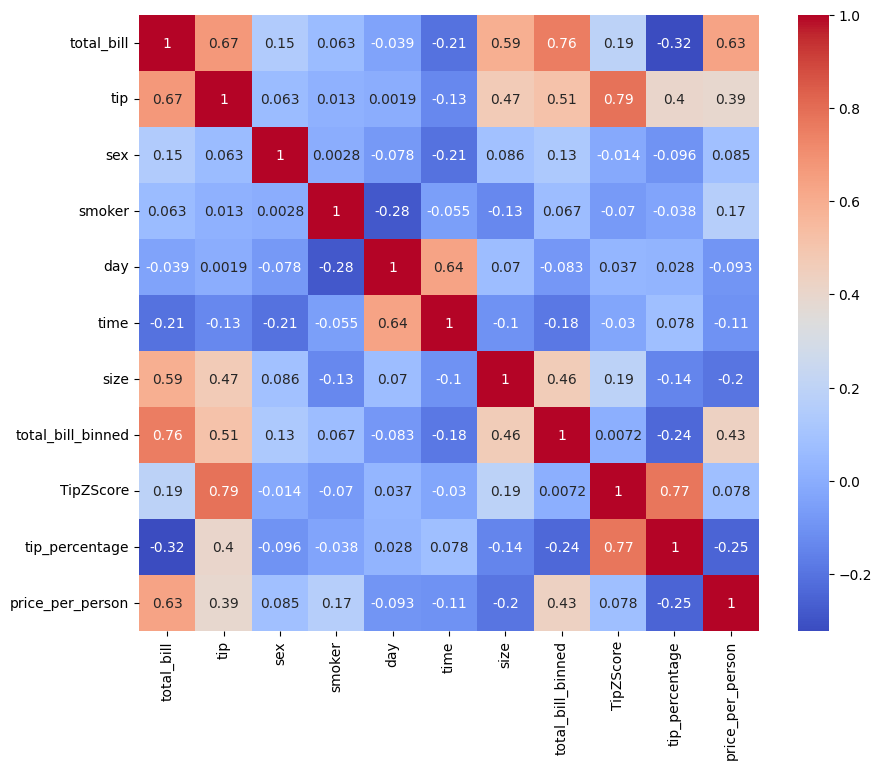

In [ ]:
#@title Visualizing covariance matrix

# Adjust the size of the plot
plt.figure(figsize=(10, 8))
# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


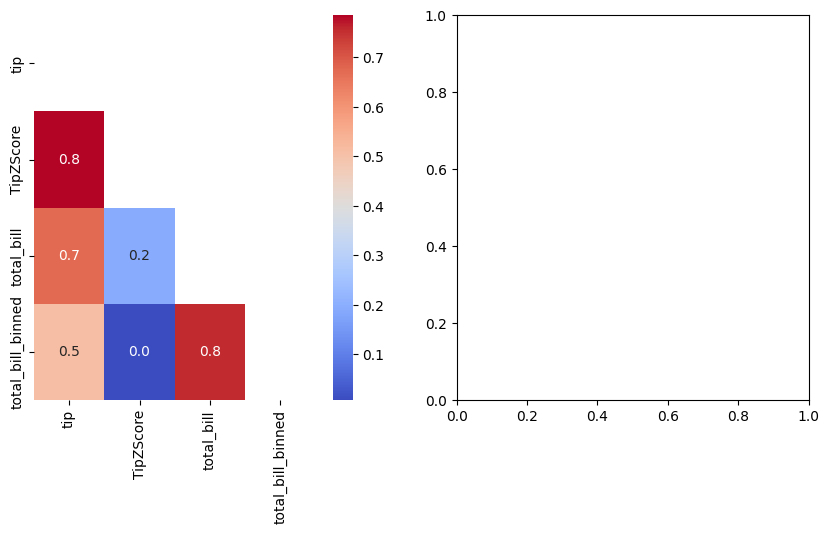

Index(['tip', 'TipZScore', 'total_bill', 'total_bill_binned'], dtype='object')

In [ ]:
#@title Visualizing correlation matrix with independent variables vs. target variable

# Use correlation matrix to select top n variables
n = 3
corr_matrix = df_enc.corr().abs()
top_correlated = corr_matrix.nlargest(n+1, "tip")["tip"].index
top_corr_matrix = df_enc[top_correlated].corr()

# Plot heatmap of top correlated variables
mask = np.zeros_like(top_corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(top_corr_matrix, annot=True, fmt='.1f', cmap="coolwarm", mask=mask, ax=ax[0])

# Compute and plot heatmap of covariance matrix instead
# cov_matrix = df.cov()
# sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", ax=ax[1])

# Show the plot
plt.show()

top_correlated

## **2.   Scaling into a range/distribution** TODO: show math formulae in LaTeX

###    **Normalization**

**Pros**:
Scales the data to a specific range, usually between 0 and 1, making it easier to compare variables.
Preserves the distribution of the data.
Useful for algorithms that assume a uniform distribution, such as k-nearest neighbors and neural networks.

**Cons**:
Outliers can have a large impact on the scaling of the data.
May not work well with certain algorithms that require specific distributions, such as Gaussian.

###    **Standardization**:

**Pros**:
Scales the data to have a mean of 0 and a standard deviation of 1, which can make the data easier to interpret.
Useful for algorithms that assume a Gaussian distribution, such as linear regression and support vector machines.
Less affected by outliers than normalization.

**Cons**:
May distort the shape of the distribution of the data, making it difficult to compare variables.

###    **Log transformation:**

**Pros**:

Useful for dealing with data that has a skewed distribution, making it easier to interpret.
Can make the data conform to assumptions of some statistical tests, such as equal variance.

**Cons**:
May not work well with data that includes 0 values.
Can cause interpretation difficulties when comparing variables, since the transformed values are not on the original scale.

###    **Non-linear methods:**

**Pros**:
Can be more flexible in modeling complex relationships between variables.
Useful for dealing with non-linear data that cannot be easily transformed by linear methods.

**Cons**:
Can be more computationally expensive than linear methods.
May be more difficult to interpret than linear methods.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (10000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(


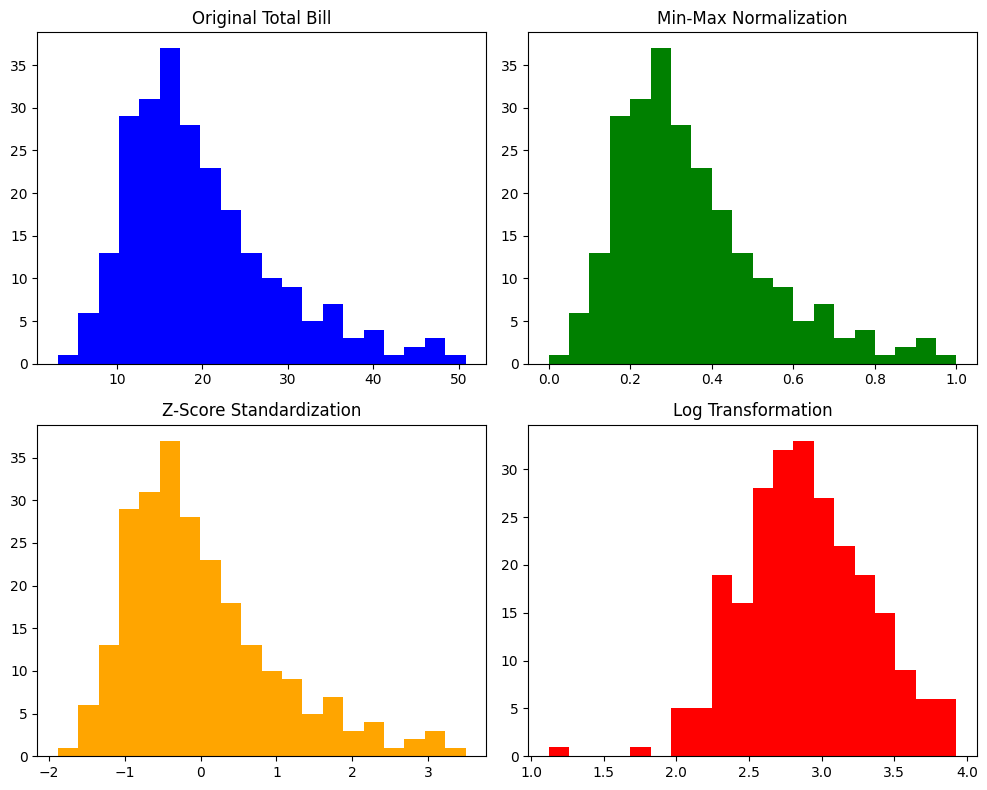

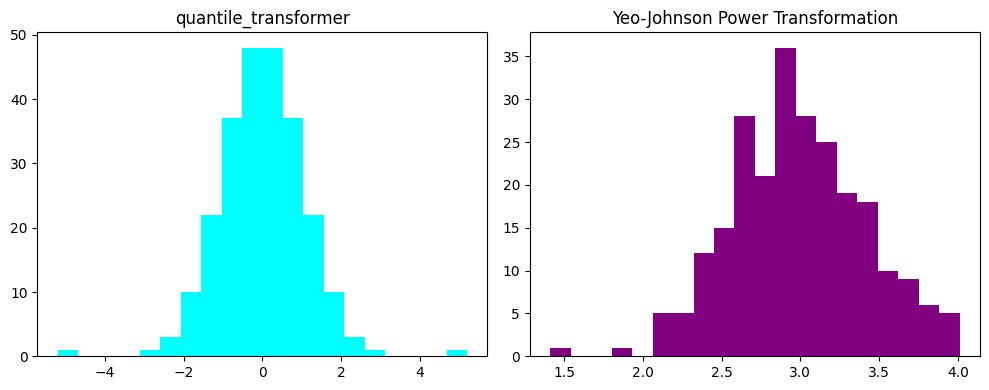

In [ ]:
#@title Scaling methods using Scikit instead of a formula

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, QuantileTransformer
import matplotlib.pyplot as plt

# Normalization using Min-Max scaling
minmax_scaler = MinMaxScaler()
df[['total_bill_norm', 'tip_norm']] = minmax_scaler.fit_transform(df[['total_bill', 'tip']])

# Standardization using z-score scaling
standard_scaler = StandardScaler()
df[['total_bill_std', 'tip_std']] = standard_scaler.fit_transform(df[['total_bill', 'tip']])

# Log transformation of the total_bill column
df['total_bill_log'] = np.log(df['total_bill'])

# Quantile transformation of the total_bill column
quantile_transformer = QuantileTransformer(n_quantiles=10000, output_distribution='normal')
df['total_bill_quantile'] = quantile_transformer.fit_transform(df[['total_bill']])

# Yeo-Johnson power transformation of the total_bill column
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
df['total_bill_yeojohnson'] = yeo_johnson_transformer.fit_transform(df[['total_bill']])

# Create a histogram of the original and transformed total_bill columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].hist(df['total_bill'], bins=20, color='blue')
axs[0, 0].set_title('Original Total Bill')
axs[0, 1].hist(df['total_bill_norm'], bins=20, color='green')
axs[0, 1].set_title('Min-Max Normalization')
axs[1, 0].hist(df['total_bill_std'], bins=20, color='orange')
axs[1, 0].set_title('Z-Score Standardization')
axs[1, 1].hist(df['total_bill_log'], bins=20, color='red')
axs[1, 1].set_title('Log Transformation')
plt.tight_layout()
plt.show()

# Create a histogram of the original and Yeo-Johnson transformed total_bill columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(df['total_bill_quantile'], bins=20, color='cyan')
axs[0].set_title('quantile_transformer')
axs[1].hist(df['total_bill_yeojohnson'], bins=20, color='purple')
axs[1].set_title('Yeo-Johnson Power Transformation')
plt.tight_layout()
plt.show()



For the tips.csv dataset, I would suggest using normalization or standardization as they are simple and effective scaling methods that work well with continuous numerical data.

**Normalization** scales the data between 0 and 1, making it easier to compare across features with different units and scales.

**Standardization** scales the data to have zero mean and unit variance, making it suitable for modeling algorithms that assume normally distributed data.

**Log transformation** may also be useful if the data is skewed, but it may not be necessary for the tips.csv dataset as the distribution of the data appears to be relatively normal.

**Non-linear methods** may be more appropriate for data with complex non-linear relationships between the features -- tips is fairly linear in nature. Check by doing a scatter plot of total_bill vs tip.

## **3.   ML One-hot encoding and Feature engineering**

### Better examples of variable types and their encoding:

**Categorical variable**: A categorical variable is a variable that can take on a limited number of values or categories. Examples of categorical variables include gender, race, and type of car.

**Ordinal variable**: An ordinal variable is a categorical variable where the categories have a natural ordering or ranking. Examples of ordinal variables include education level (e.g., high school, college, graduate school) and income level (e.g., low, medium, high).

**Nominal variable**: A nominal variable is a categorical variable where the categories do not have a natural ordering or ranking. Examples of nominal variables include eye color and type of fruit.

**One-hot encoding**: One-hot encoding is a technique for converting categorical variables into a format that can be used by machine learning algorithms. One-hot encoding creates a new binary variable for each category in the categorical variable, where the value is 1 if the observation belongs to that category and 0 otherwise.

**Label encoding**: Label encoding is another technique for converting categorical variables into a format that can be used by machine learning algorithms. Label encoding assigns a unique numerical value to each category in the categorical variable, with the values ranging from 0 to n-1, where n is the number of categories.

**Dummy variable**: A type of binary variable that takes on the value 0 or 1 to show that an observation should be in a particular category or not.

**Binary variable**: A binary variable is a variable that can take on one of two possible values, often denoted as 0 or 1. Examples of binary variables include gender (Male or Female) and whether a customer made a purchase (Yes or No).

*The goal of encoding is to make the categorical data usable by machine learning algorithms, which typically require numerical inputs.*

## Encoding and its relevance to the Tips dataset

The **sex column** in the dataset is a categorical variable that contains two categories: Male and Female. **One-hot encoding the sex column** will create **two new columns**, one for Male and one for Female, and assign a value of 1 or 0 depending on whether the customer is male or female.

Encoding is important because machine learning algorithms typically cannot handle categorical variables directly. By converting the sex column into a one-hot encoded format, the machine learning algorithm will be able to use this information as input for making predictions.

What other columns need to be one-hot encoded to be used in ML?

In [ ]:
#@title OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df.head()

# One-hot encode the 'sex' column
encoder = OneHotEncoder()
sex_encoded = encoder.fit_transform(df[['sex']])
sex_labels = ['female', 'male']
sex_encoded_df = pd.DataFrame(sex_encoded.toarray(), columns=[f'sex_{label}' for label in sex_labels])
df = pd.concat([df, sex_encoded_df], axis=1)

# Print the first five rows of the modified dataframe
df.head()


,total_bill,tip,sex,smoker,day,time,size,sex_female,sex_male
0,16.99,1.01,Female,No,Sun,Dinner,2,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.0,1.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.0,1.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.0,1.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1.0,0.0


### Feature engineering TODO better... or maybe not

**Feature engineering** is the process of creating new features or variables from existing ones to improve the performance of machine learning models. This involves selecting and transforming relevant variables in a dataset to enhance their predictive power, as well as generating new variables that capture important relationships between the features and the target variable. By carefully selecting and engineering features, machine learning models can more accurately capture complex relationships within the data and make more accurate predictions.

**One-hot encoding** is a commonly used technique for converting categorical variables into a format that can be used by machine learning algorithms such as NN and tree ensembles.

Loaded the tips dataset, one-hot encode the sex column using the OneHotEncoder class from scikit-learn, and create new columns in the dataframe based on the existing tip and total_bill columns and the total_bill and size columns.

*Creating new variables based on existing variables can also help capture important information about the underlying data and improve model accuracy as in the next example.*

# **e. Data reduction:**
1.   Sample the data to reduce its size.
2.   Select relevant variables for using correlation analysis.
3.   Automatic feature selection techniques to select the most important variables.



In [ ]:
# @title Data reduction

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the tips dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**LabelEncoder**, which is another technique for converting categorical variables into a format that can be used by machine learning algorithms. LabelEncoder assigns a unique numerical value to each category in a categorical variable, with the values ranging from 0 to n-1, where n is the number of categories.

While LabelEncoder can be a useful technique for encoding categorical variables, it has some ***limitations*** compared to **one-hot encoding**. One limitation is that LabelEncoder assigns arbitrary numerical values to the categories, which can lead to the machine learning algorithm assuming that there is some ordinal relationship between the values when there is not. For example, if we encode the gender variable as 0 for Male and 1 for Female, the machine learning algorithm may assume that Female is somehow "more" than Male because its value is higher.

One-hot encoding, on the other hand, creates new columns for each category in the categorical variable and assigns a value of 1 or 0 depending on whether the observation belongs to that category or not. This approach avoids the problem of arbitrary numerical values and ensures that each category is treated equally in the analysis.

Therefore, in the context of the tips dataset, using one-hot encoding to encode the sex variable is preferred over LabelEncoder, as there is **no natural order or hierarchy between Male and Female**. However, using LabelEncoder to encode other categorical variables, such as smoker, day, and time, may be appropriate if there is some inherent ordering or hierarchy between the categories.

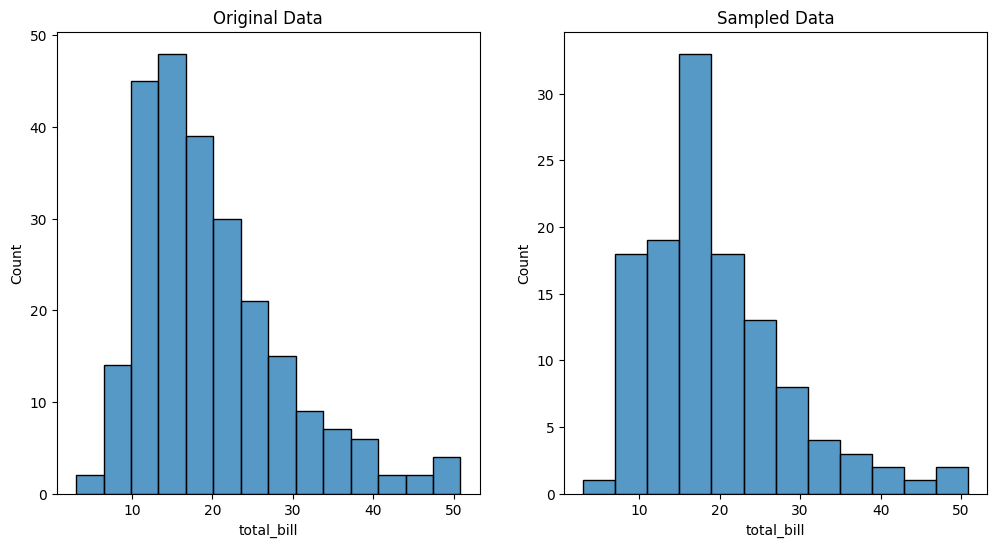

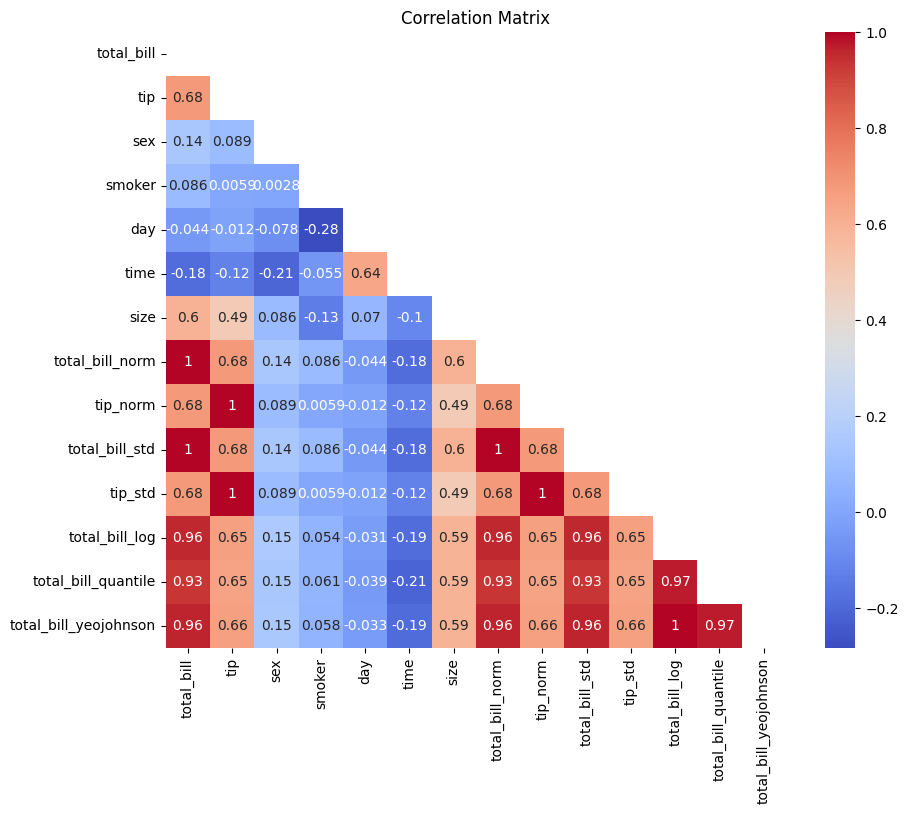

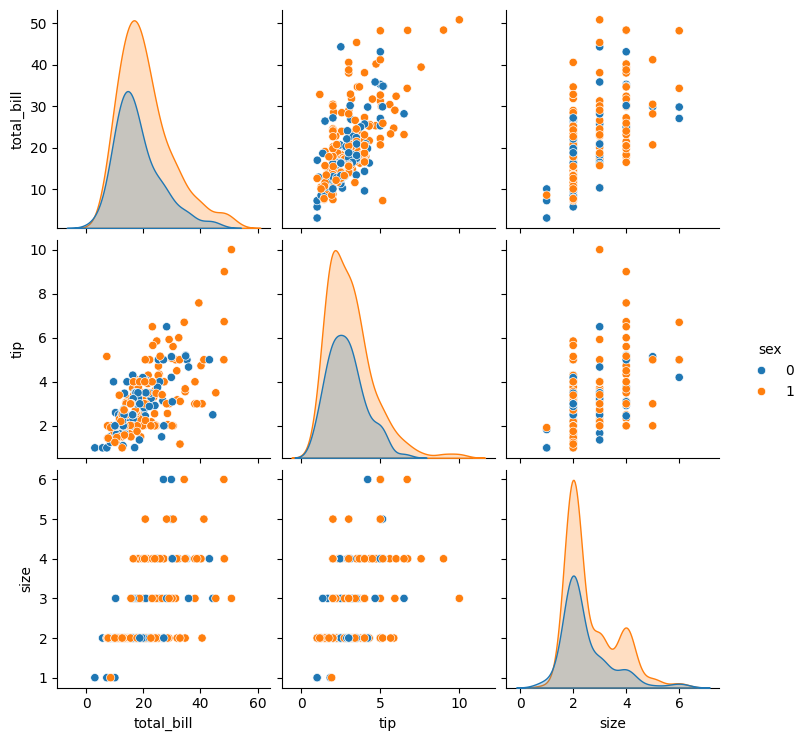

Correlation between 'smoker' and 'tip': 0.0059285395278065815


In [ ]:
#@title
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# # rename columns
# df.columns = ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

# encode categorical variables
categorical_cols = ['sex', 'smoker', 'day', 'time']
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(le.fit_transform)

# 1. sample the data to reduce its size
df_sample = df.sample(frac=0.5, random_state=42)

# visualise the difference
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.histplot(data=df, x="total_bill", ax=axs[0])
axs[0].set_title("Original Data")
sns.histplot(data=df_sample, x="total_bill", ax=axs[1])
axs[1].set_title("Sampled Data")
plt.show()

# 2. select relevant variables for using correlation analysis
plt.figure(figsize=(10, 8))
corr = df.corr()
# Easy upper triangle mask as promised
upper_mask = np.triu(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm", mask=upper_mask)
plt.title("Correlation Matrix")
plt.show()

# visualise and remove irrelevant variables
sns.pairplot(df[["total_bill", "tip", "size", "sex"]], hue="sex")
plt.show()

# Drop a variable if you think it does not affect the target
# df = df.drop("sex", axis=1)

# 3. automatic feature selection techniques to select the most important variables
# separate X and y
X = df.drop("tip", axis=1)
y = df["tip"]

# apply feature selection
selector = SelectKBest(f_regression, k=2)
selector.fit(X, y)

# get the selected feature columns
cols = selector.get_support(indices=True)
selected_features_df = X.iloc[:,cols]

# visualise and remove unselected variables
# sns.pairplot(df[selected_features_df.columns.tolist()+['tip']])
# plt.show()

# Calculate correlation between 'smoker' and 'tip' variables
smoker_tip_corr = df['smoker'].corr(df['tip'])

print(f"Correlation between 'smoker' and 'tip': {smoker_tip_corr}")

So does the sex of the customer influence the outcome variable, or anything for that matter?

The short analysis of the tips dataset suggests that the sex of the customer **does not significantly influence the tip amount**. However, other factors such as the total bill amount, the size of the party, and whether the customer is a smoker or not, do seem to have an impact on the tip amount. Do we require more control over variables such as regression or is this as far as we can analyze given the toy tips.csv?

# Conclusion

Data reduction techniques such as sampling, variable selection by correlation, and automatic feature selection are useful for reducing the size and complexity of a dataset, which is often carried out to improve the efficiency and accuracy of machine learning models.

Does it also enhance Data Analysis methods toward achieving crystal clear Results Analysis? Find out in the next Chapter :D